## 회귀 (regression) 예측

수치형 값을 예측 (Y의 값이 연속된 수치로 표현)

**예시**
- 주택 가격 예측
- 매출액 예측

[도큐먼트](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)

In [2]:
import pandas as pd
import numpy as np

np.set_printoptions(suppress=True)

scikit-learn version 1.2. 이후부터는 load_boston이 삭제되어서 다음과 같이 데이터셋을 불러옴

from sklearn.datasets import fetch_openml

boston = fetch_openml(name="boston", version=1, as_frame=True)

In [3]:
from sklearn.datasets import fetch_openml

data = fetch_openml(name="boston", version=1, as_frame=True)
# boston은 sklearn.utils.Bunch 객체
# Python의 딕셔너리와 유사한 구조, 속성에 점(.)으로 접근 가능
print(data.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


데이터 로드

In [4]:
print(data['DESCR'])

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

data['data']에는 X 데이터, data['feature_names']에는 컬럼 명입니다.

In [5]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])

Y 데이터인 price도 데이터프레임에 추가 합니다.

In [6]:
df['MEDV'] = data['target']

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


**컬럼 소개**

속성 수 : 13

* **CRIM**: 범죄율
* **ZN**: 25,000 평방 피트 당 주거용 토지의 비율
* **INDUS**: 비소매(non-retail) 비즈니스 면적 비율
* **CHAS**: 찰스 강 더미 변수 (통로가 하천을 향하면 1; 그렇지 않으면 0)
* **NOX**: 산화 질소 농도 (천만 분의 1)
* **RM**:주거 당 평균 객실 수
* **AGE**: 1940 년 이전에 건축된 자가 소유 점유 비율
* **DIS**: 5 개의 보스턴 고용 센터까지의 가중 거리     
* **RAD**: 고속도로 접근성 지수
* **TAX**: 10,000 달러 당 전체 가치 재산 세율
* **PTRATIO**  도시 별 학생-교사 비율
* **B**: 1000 (Bk-0.63) ^ 2 여기서 Bk는 도시 별 검정 비율입니다.
* **LSTAT**: 인구의 낮은 지위
* **MEDV**: 자가 주택의 중앙값 (1,000 달러 단위)

In [8]:
# 참고
# 위와 같이 직접 데이터프레임 생성 가능
# 또한 data.frame에 입력 데이터(data)와 타겟(target)이 합쳐진 데이터프레임이 이미 존재하므로 해당 데이터프레임을 바로 선언 가능
df2 = data.frame
df2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


train / test 데이터를 분할 합니다.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('MEDV', axis=1), df['MEDV'])

In [11]:
x_train.shape, x_test.shape

((379, 13), (127, 13))

In [12]:
x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
371,9.23230,0.0,18.10,0,0.631,6.216,100.0,1.1691,24,666.0,20.2,366.15,9.53
410,51.13580,0.0,18.10,0,0.597,5.757,100.0,1.4130,24,666.0,20.2,2.60,10.11
340,0.06151,0.0,5.19,0,0.515,5.968,58.5,4.8122,5,224.0,20.2,396.90,9.29
119,0.14476,0.0,10.01,0,0.547,5.731,65.2,2.7592,6,432.0,17.8,391.50,13.61
458,7.75223,0.0,18.10,0,0.713,6.301,83.7,2.7831,24,666.0,20.2,272.21,16.23


In [13]:
y_train.head()

371    50.0
410    15.0
340    18.7
119    19.3
458    14.9
Name: MEDV, dtype: float64

## 평가 지표 만들기

### MSE(Mean Squared Error)

${(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$

예측값과 실제값의 차이에 대한 **제곱**에 대하여 평균을 낸 값

### MAE (Mean Absolute Error)

$(\frac{1}{n})\sum_{i=1}^{n}\left | y_{i} - x_{i} \right |$

예측값과 실제값의 차이에 대한 **절대값**에 대하여 평균을 낸 값

### RMSE (Root Mean Squared Error)

$\sqrt{(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$


예측값과 실제값의 차이에 대한 **제곱**에 대하여 평균을 낸 뒤 **루트**를 씌운 값

### 평가 지표 만들어 보기

In [14]:
import numpy as np

In [15]:
pred = np.array([3, 4, 5])
actual = np.array([1, 2, 3])

In [16]:
def my_mse(pred, actual):
    return ((pred - actual)**2).mean()

In [17]:
my_mse(pred, actual)

np.float64(4.0)

In [18]:
def my_mae(pred, actual):
    return np.abs(pred - actual).mean()

In [19]:
my_mae(pred, actual)

np.float64(2.0)

In [20]:
def my_rmse(pred, actual):
    return np.sqrt(my_mse(pred, actual))

In [21]:
my_rmse(pred, actual)

np.float64(2.0)

### sklearn의 평가지표 활용하기

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [23]:
my_mae(pred, actual), mean_absolute_error(pred, actual)

(np.float64(2.0), 2.0)

In [24]:
my_mse(pred, actual), mean_squared_error(pred, actual)

(np.float64(4.0), 4.0)

### 모델별 성능 확인을 위한 함수

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive',
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray',
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global predictions
    global colors

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    print(type(y_value), y_value)

    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10

    length = len(df)

    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])

    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')

    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)

    plt.show()

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

## LinearRegression

[도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model = LinearRegression(n_jobs=-1)

In [28]:
# 데이터의 CHAS와 RAD가 category 타입이라서 그대로 predict를 하면 TypeError가 발생
# 마찬가지로 train 데이터도 타입을 변경해서 fit을 해주는게 일관성 유지에 도움
x_test.dtypes

CRIM        float64
ZN          float64
INDUS       float64
CHAS       category
NOX         float64
RM          float64
AGE         float64
DIS         float64
RAD        category
TAX         float64
PTRATIO     float64
B           float64
LSTAT       float64
dtype: object

* n_jobs: CPU코어의 사용

In [29]:
# astype으로 타입 변경
x_train = x_train.astype(float)
x_test = x_test.astype(float)

In [30]:
model.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [31]:
pred = model.predict(x_test)

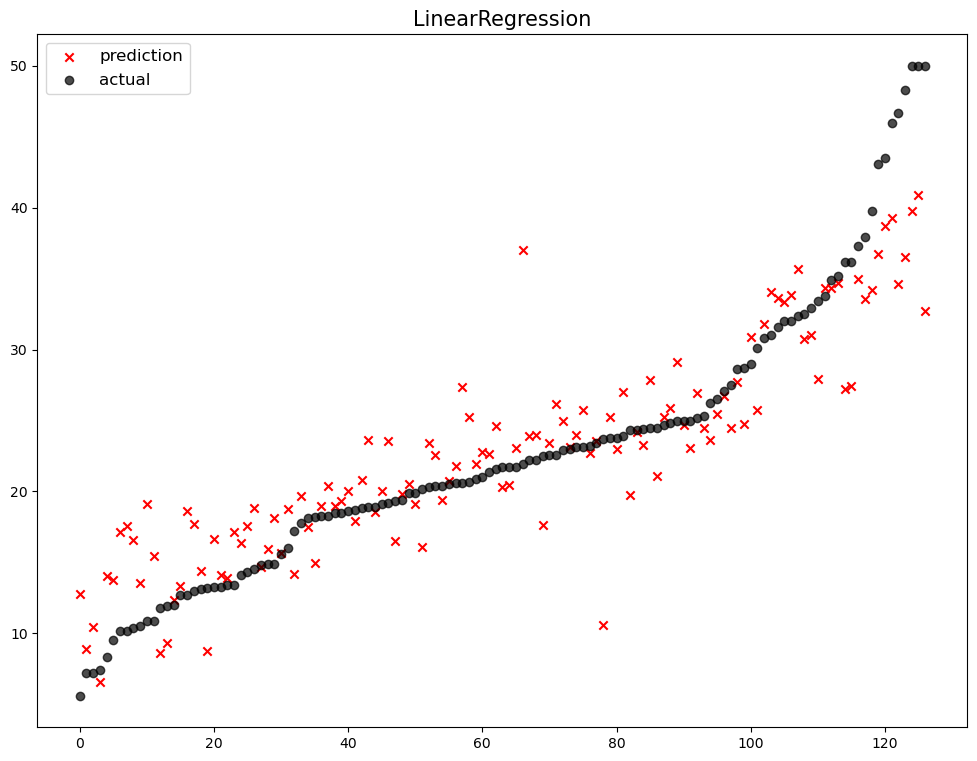

<class 'list'> [('LinearRegression', 19.63292883381753)]
              model        mse
0  LinearRegression  19.632929


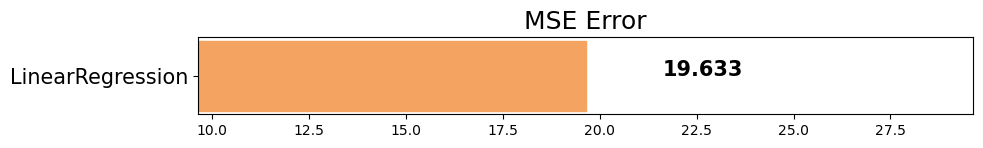

In [32]:
mse_eval('LinearRegression', pred, y_test)

## 규제 (Regularization)

학습이 과대적합 되는 것을 방지하고자 일종의 **penalty**를 부여하는 것

**L2 규제 (L2 Regularization)**

* 각 가중치 제곱의 합에 규제 강도(Regularization Strength) λ를 곱한다.
* λ를 크게 하면 가중치가 더 많이 감소되고(규제를 중요시함), λ를 작게 하면 가중치가 증가한다(규제를 중요시하지 않음).

**L1 규제 (L1 Regularization)**

* 가중치의 제곱의 합이 아닌 **가중치의 합**을 더한 값에 규제 강도(Regularization Strength) λ를 곱하여 오차에 더한다.
* 어떤 가중치(w)는 실제로 0이 된다. 즉, 모델에서 완전히 제외되는 특성이 생기는 것이다.


**L2 규제가 L1 규제에 비해 더 안정적이라 일반적으로는 L2규제가 더 많이 사용된다**

**릿지(Ridge) - L2 규제**

$Error=MSE+αw^2$

**라쏘(Lasso) - L1 규제**  

$Error=MSE+α|w|$

In [33]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [ ]:
def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)

    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

In [35]:
from sklearn.linear_model import Lasso

In [36]:
# 값이 커질 수록 큰 규제입니다.
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

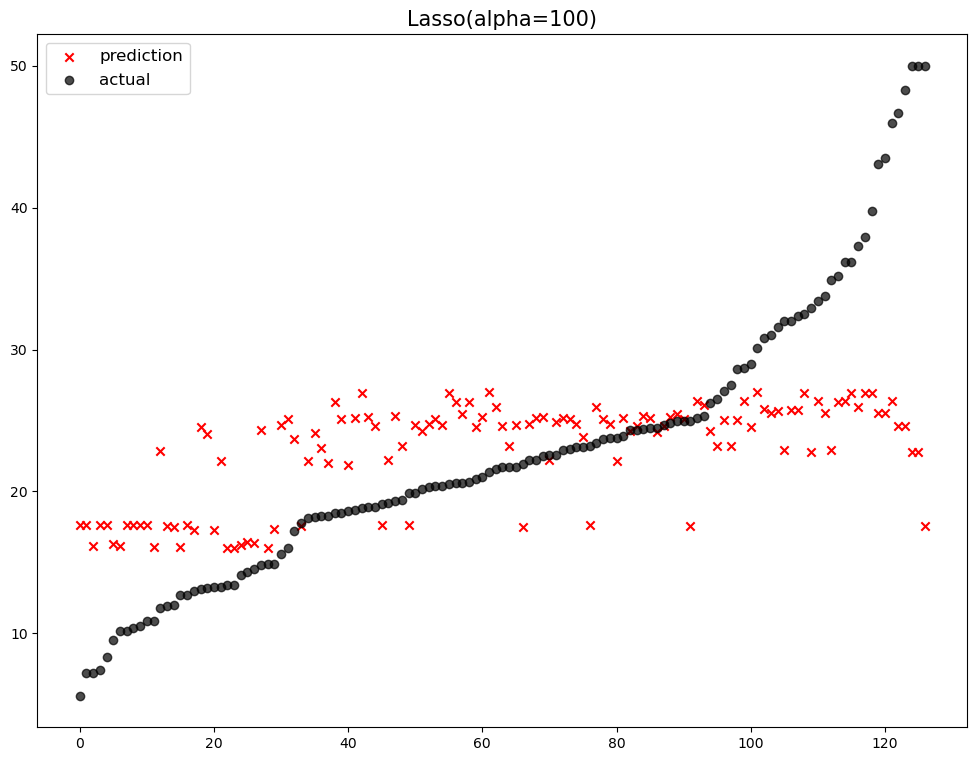

<class 'list'> [('Lasso(alpha=100)', 68.54985530874796), ('LinearRegression', 19.63292883381753)]
              model        mse
0  Lasso(alpha=100)  68.549855
1  LinearRegression  19.632929


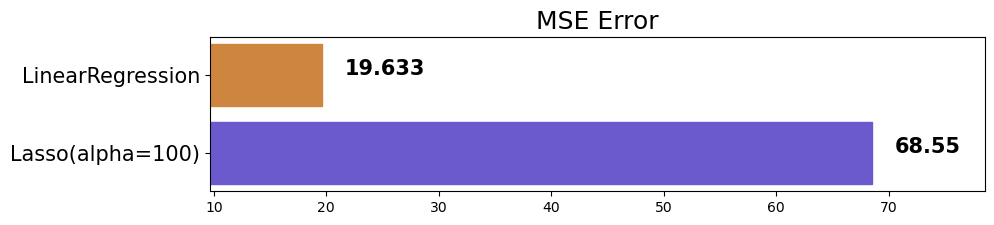

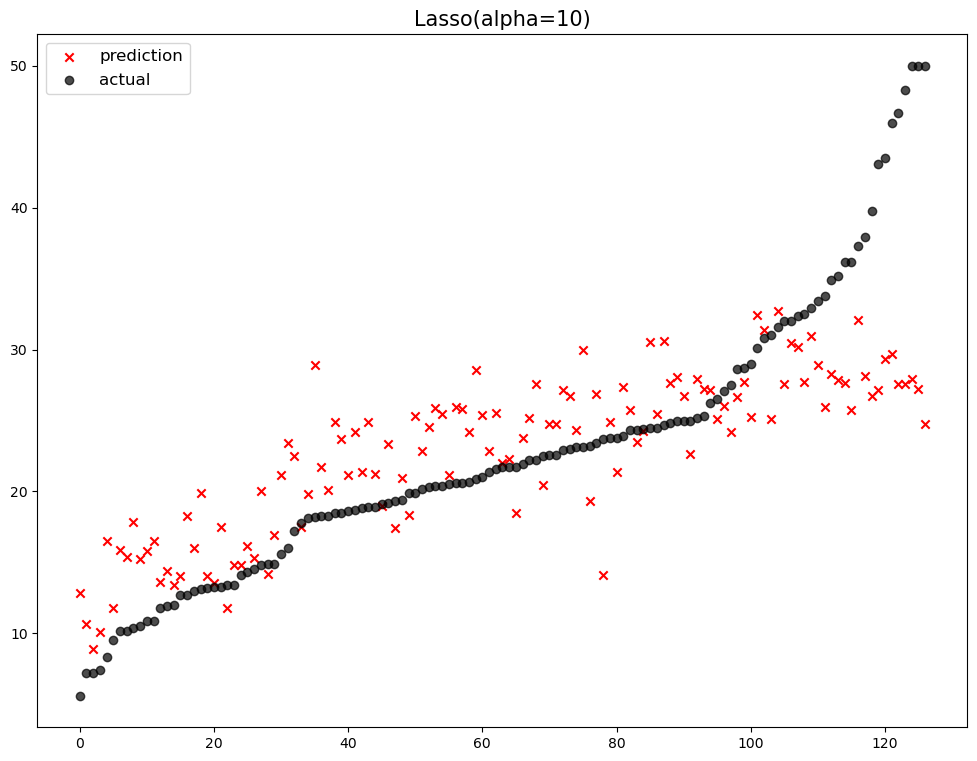

<class 'list'> [('Lasso(alpha=100)', 68.54985530874796), ('Lasso(alpha=10)', 43.58901089020935), ('LinearRegression', 19.63292883381753)]
              model        mse
0  Lasso(alpha=100)  68.549855
1   Lasso(alpha=10)  43.589011
2  LinearRegression  19.632929


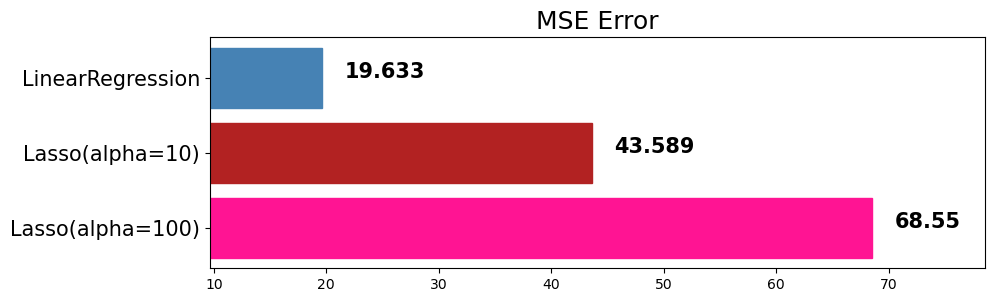

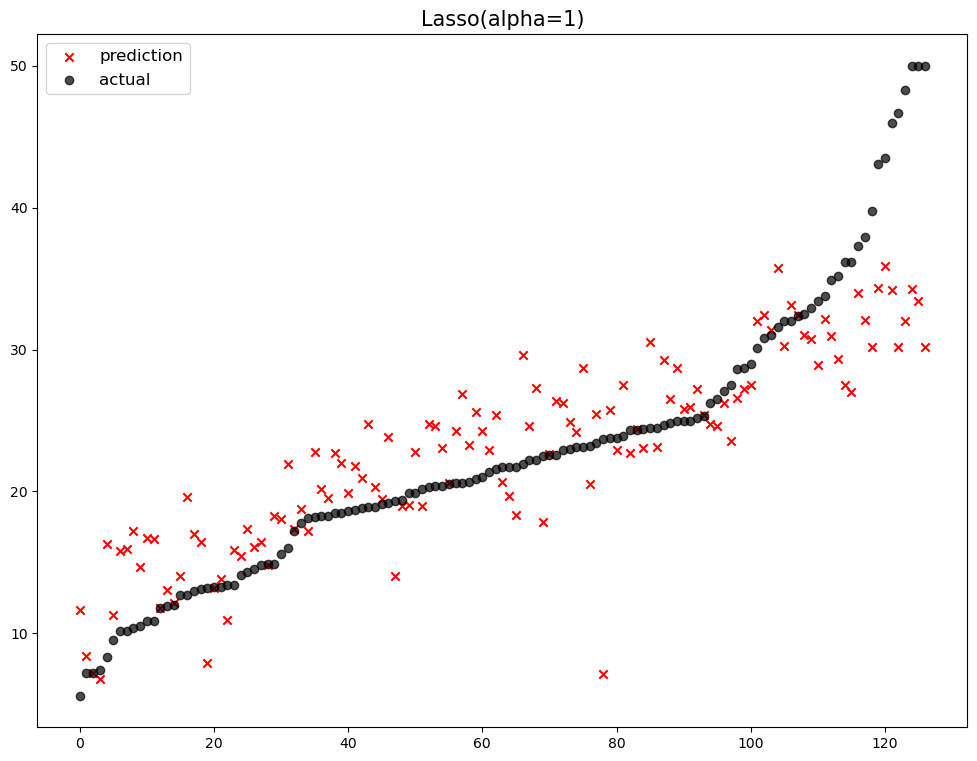

<class 'list'> [('Lasso(alpha=100)', 68.54985530874796), ('Lasso(alpha=10)', 43.58901089020935), ('Lasso(alpha=1)', 28.00564800675634), ('LinearRegression', 19.63292883381753)]
              model        mse
0  Lasso(alpha=100)  68.549855
1   Lasso(alpha=10)  43.589011
2    Lasso(alpha=1)  28.005648
3  LinearRegression  19.632929


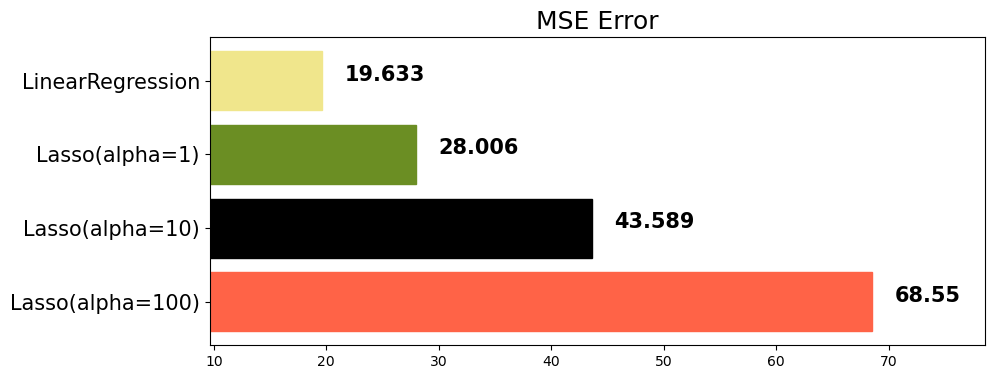

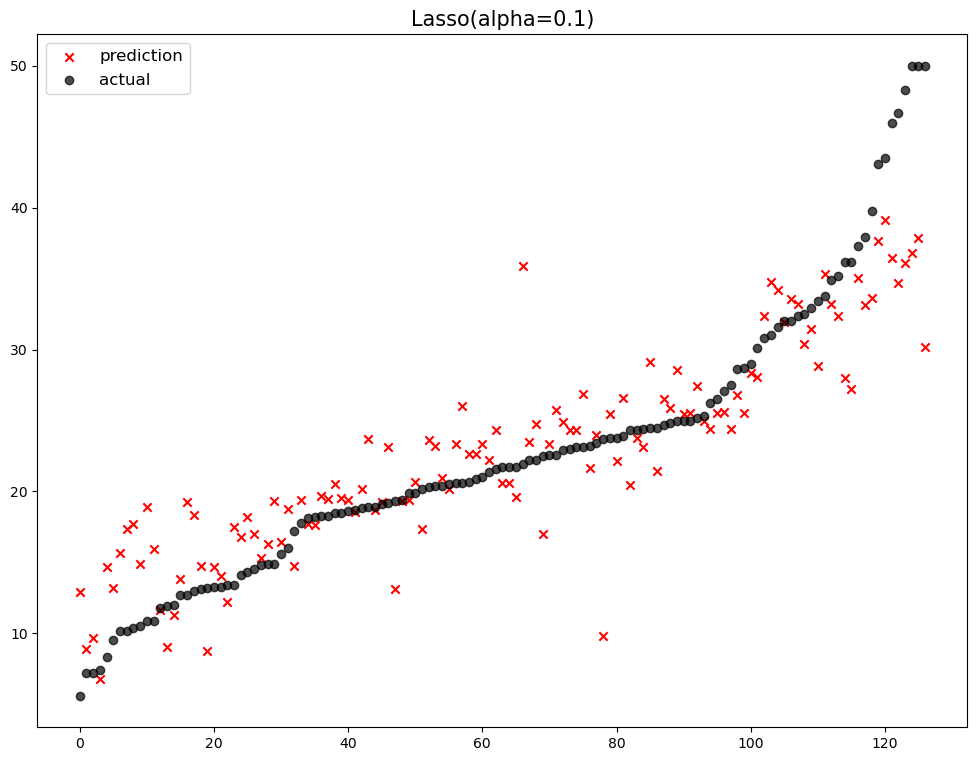

<class 'list'> [('Lasso(alpha=100)', 68.54985530874796), ('Lasso(alpha=10)', 43.58901089020935), ('Lasso(alpha=1)', 28.00564800675634), ('Lasso(alpha=0.1)', 21.55427195561399), ('LinearRegression', 19.63292883381753)]
              model        mse
0  Lasso(alpha=100)  68.549855
1   Lasso(alpha=10)  43.589011
2    Lasso(alpha=1)  28.005648
3  Lasso(alpha=0.1)  21.554272
4  LinearRegression  19.632929


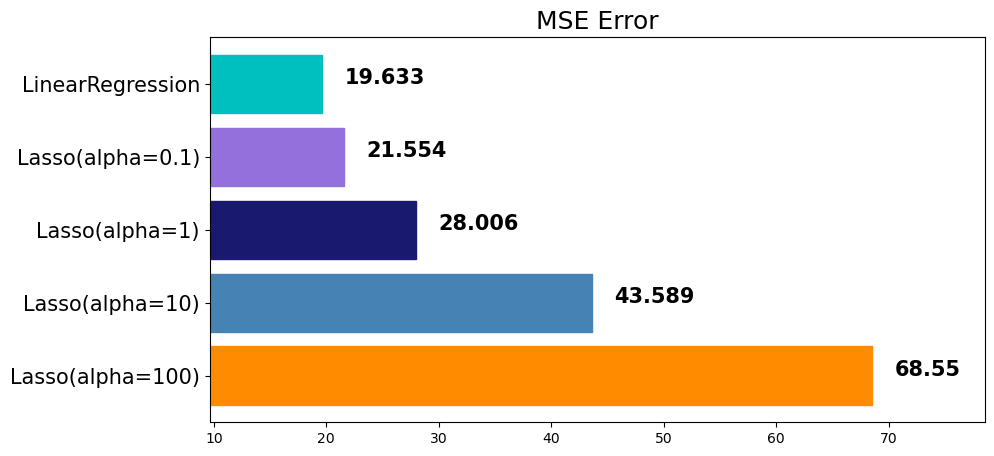

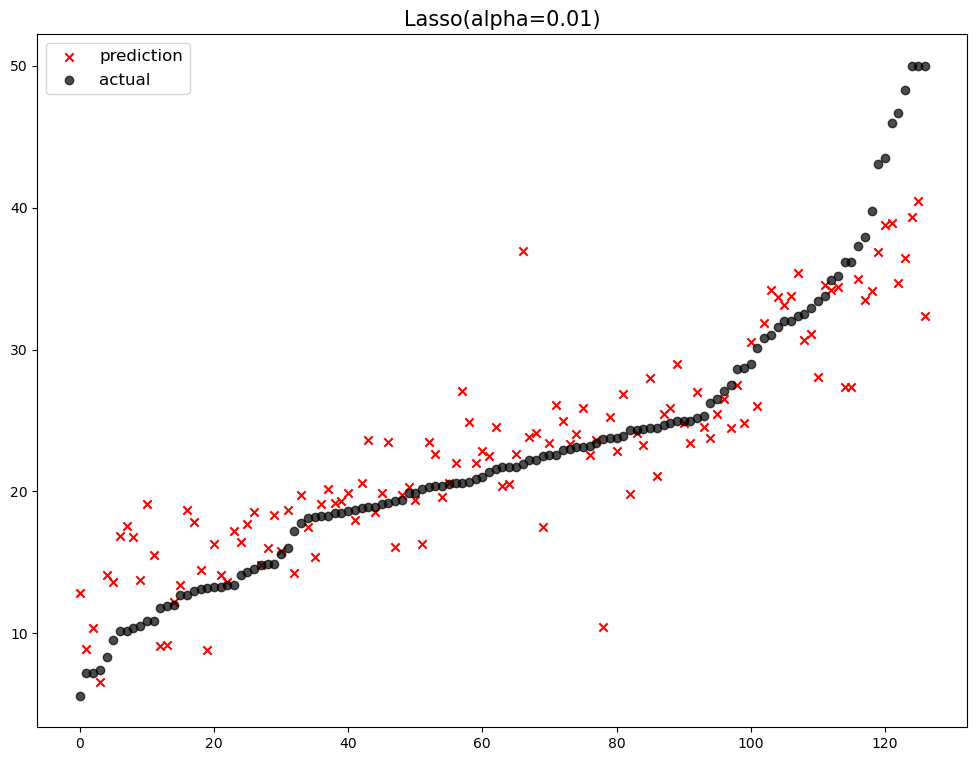

<class 'list'> [('Lasso(alpha=100)', 68.54985530874796), ('Lasso(alpha=10)', 43.58901089020935), ('Lasso(alpha=1)', 28.00564800675634), ('Lasso(alpha=0.1)', 21.55427195561399), ('Lasso(alpha=0.01)', 19.707100947051284), ('LinearRegression', 19.63292883381753)]
               model        mse
0   Lasso(alpha=100)  68.549855
1    Lasso(alpha=10)  43.589011
2     Lasso(alpha=1)  28.005648
3   Lasso(alpha=0.1)  21.554272
4  Lasso(alpha=0.01)  19.707101
5   LinearRegression  19.632929


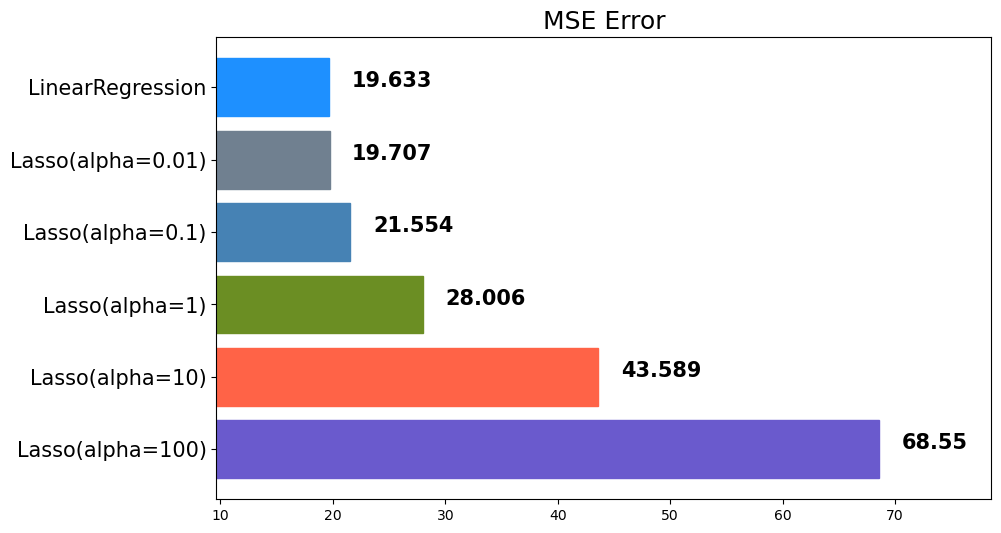

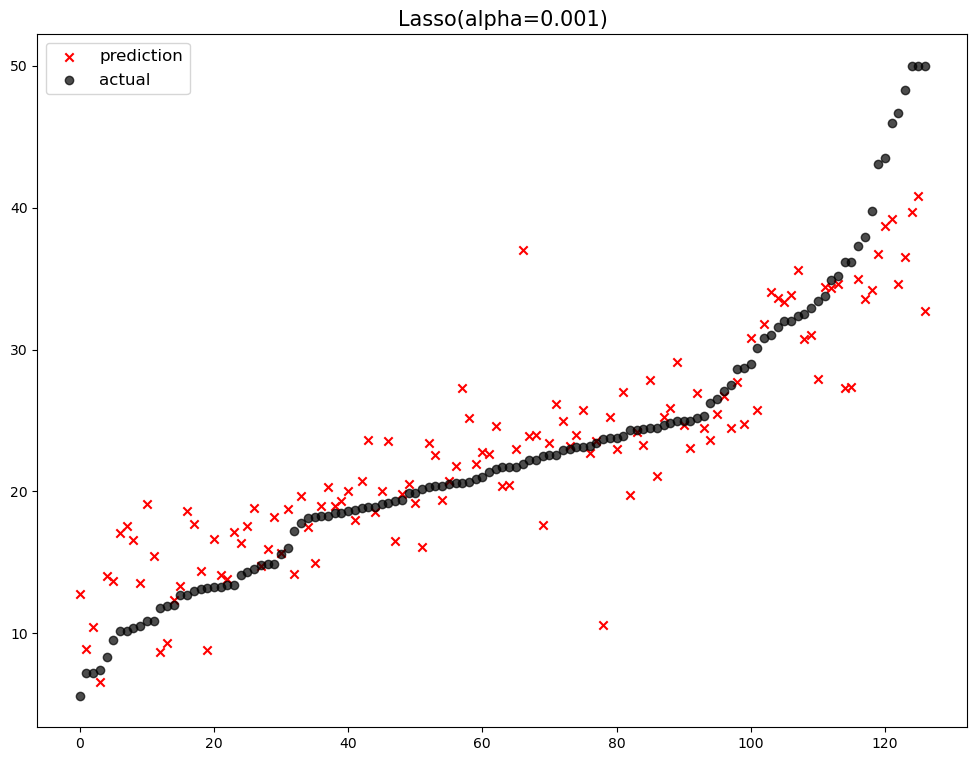

<class 'list'> [('Lasso(alpha=100)', 68.54985530874796), ('Lasso(alpha=10)', 43.58901089020935), ('Lasso(alpha=1)', 28.00564800675634), ('Lasso(alpha=0.1)', 21.55427195561399), ('Lasso(alpha=0.01)', 19.707100947051284), ('Lasso(alpha=0.001)', 19.63753295089373), ('LinearRegression', 19.63292883381753)]
                model        mse
0    Lasso(alpha=100)  68.549855
1     Lasso(alpha=10)  43.589011
2      Lasso(alpha=1)  28.005648
3    Lasso(alpha=0.1)  21.554272
4   Lasso(alpha=0.01)  19.707101
5  Lasso(alpha=0.001)  19.637533
6    LinearRegression  19.632929


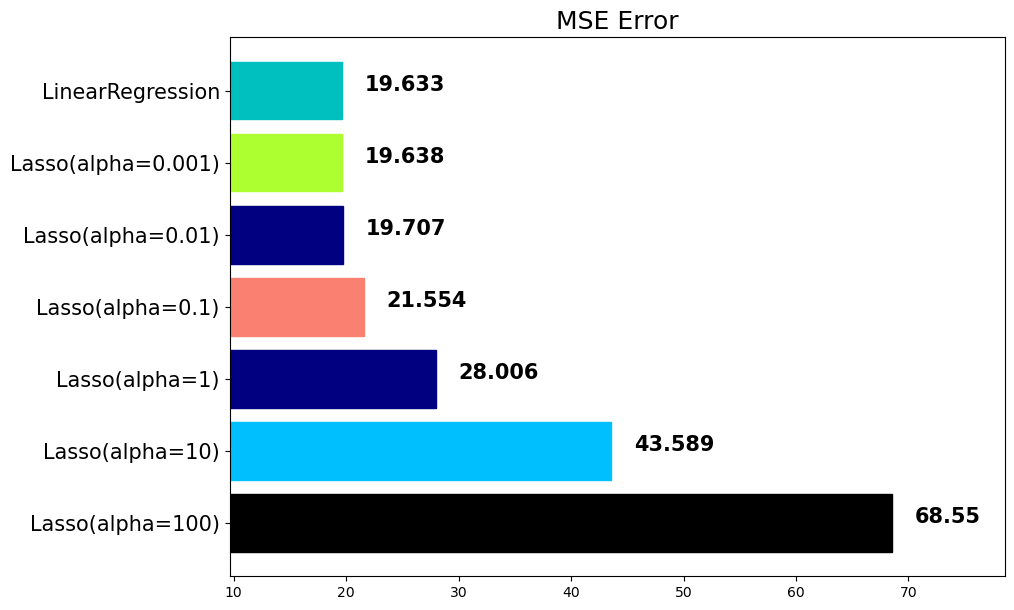

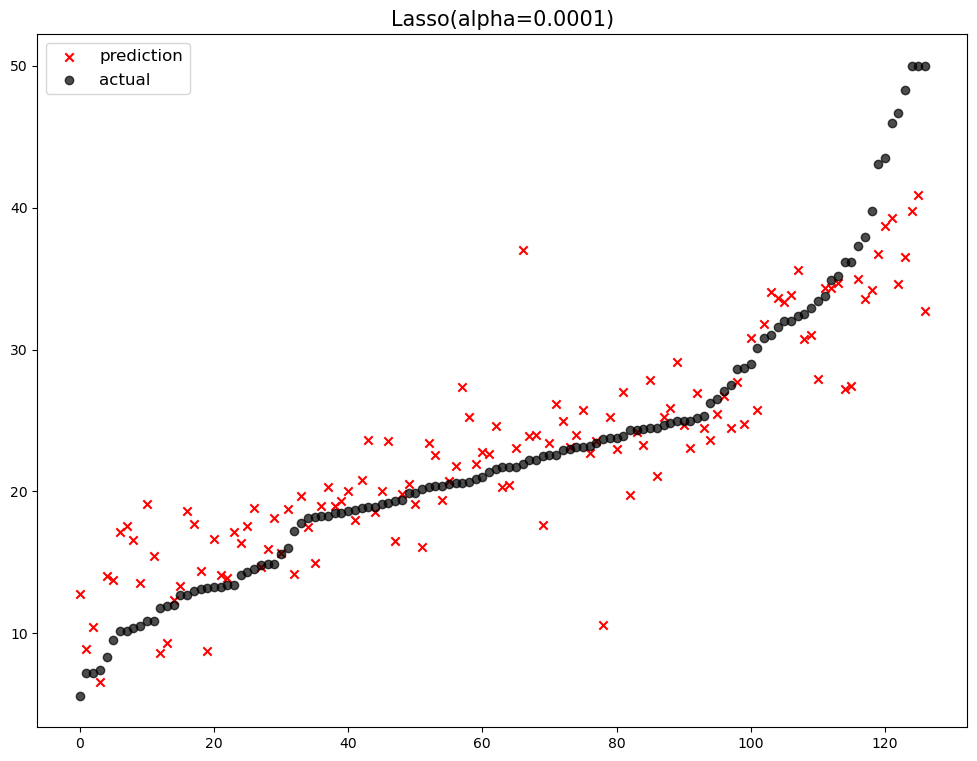

<class 'list'> [('Lasso(alpha=100)', 68.54985530874796), ('Lasso(alpha=10)', 43.58901089020935), ('Lasso(alpha=1)', 28.00564800675634), ('Lasso(alpha=0.1)', 21.55427195561399), ('Lasso(alpha=0.01)', 19.707100947051284), ('Lasso(alpha=0.001)', 19.63753295089373), ('Lasso(alpha=0.0001)', 19.63336107407811), ('LinearRegression', 19.63292883381753)]
                 model        mse
0     Lasso(alpha=100)  68.549855
1      Lasso(alpha=10)  43.589011
2       Lasso(alpha=1)  28.005648
3     Lasso(alpha=0.1)  21.554272
4    Lasso(alpha=0.01)  19.707101
5   Lasso(alpha=0.001)  19.637533
6  Lasso(alpha=0.0001)  19.633361
7     LinearRegression  19.632929


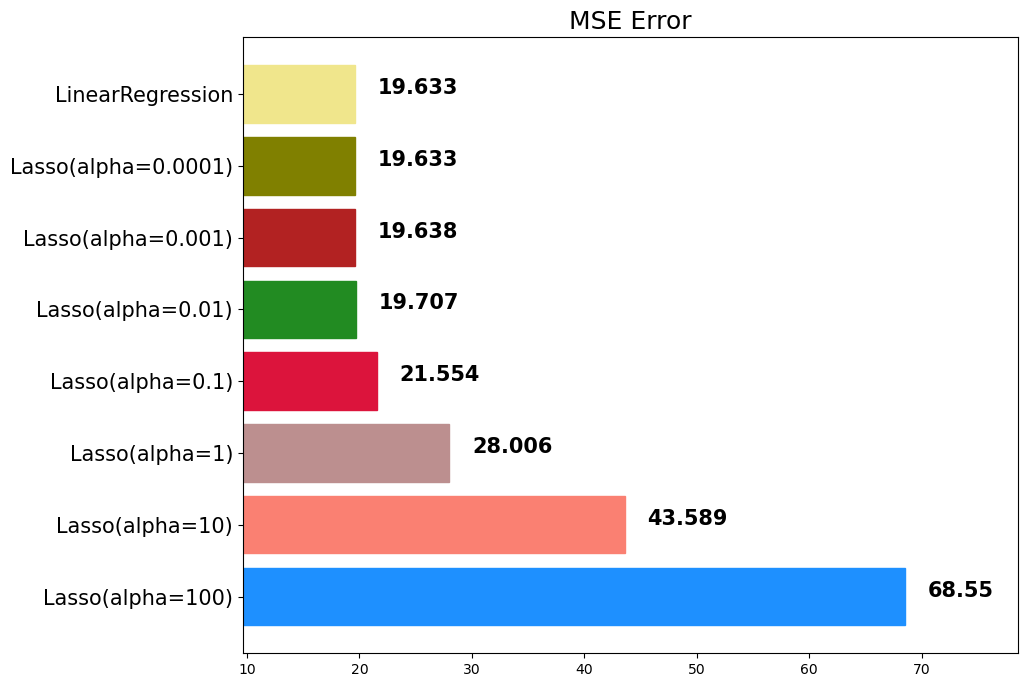

In [37]:
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_train, y_train)
    pred = lasso.predict(x_test)
    mse_eval('Lasso(alpha={})'.format(alpha), pred, y_test)

In [38]:
lasso_100 = Lasso(alpha=100)
lasso_100.fit(x_train, y_train)
lasso_pred_100 = lasso_100.predict(x_test)

lasso_001 = Lasso(alpha=0.001)
lasso_001.fit(x_train, y_train)
lasso_pred_001 = lasso_001.predict(x_test)

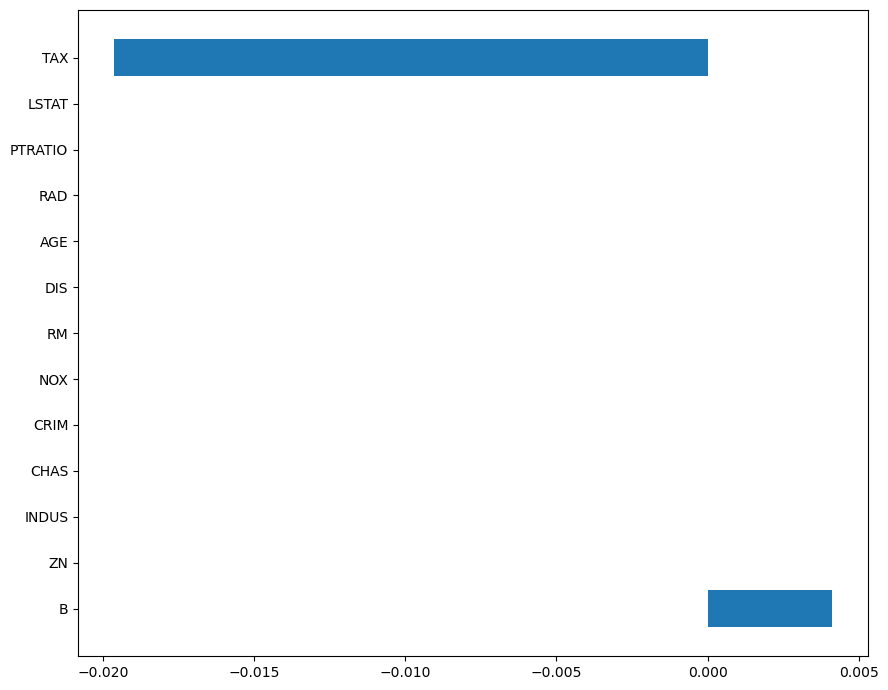

In [39]:
plot_coef(x_train.columns, lasso_100.coef_)

In [40]:
lasso_100.coef_

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.01963215,
       -0.        ,  0.00411911, -0.        ])

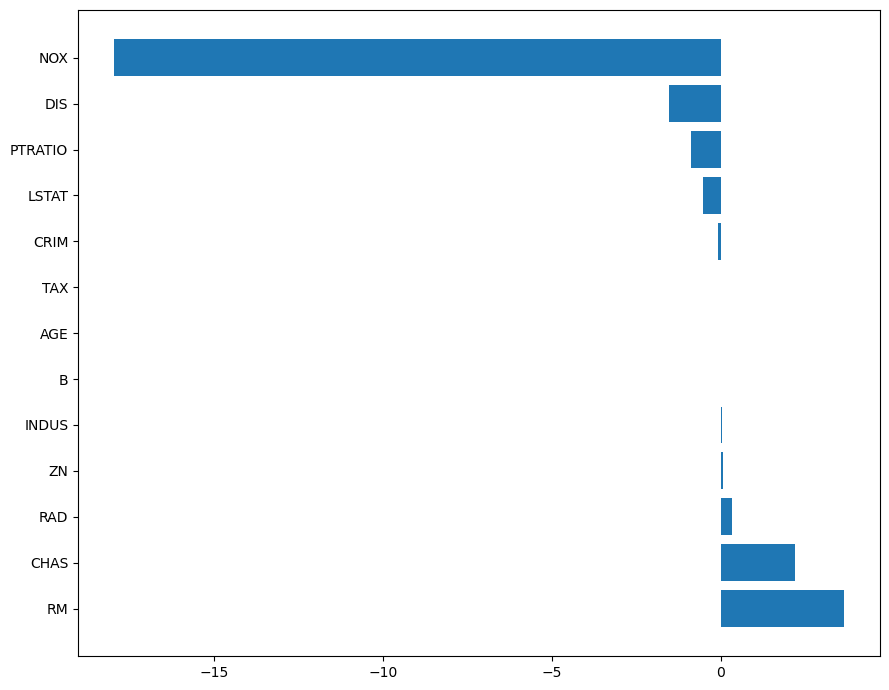

In [41]:
plot_coef(x_train.columns, lasso_001.coef_)

In [42]:
lasso_001.coef_

array([ -0.08528703,   0.06225093,   0.03338377,   2.18975767,
       -17.94248539,   3.62473896,   0.00631855,  -1.5266568 ,
         0.31943181,  -0.0124517 ,  -0.88307519,   0.00863809,
        -0.53306752])

### ElasticNet

**l1_ratio (default=0.5)**

 * l1_ratio = 0 (L2 규제만 사용).
 * l1_ratio = 1 (L1 규제만 사용).
 * 0 < l1_ratio < 1 (L1 and L2 규제의 혼합사용)

In [43]:
from sklearn.linear_model import ElasticNet

In [44]:
ratios = [0.2, 0.5, 0.8]

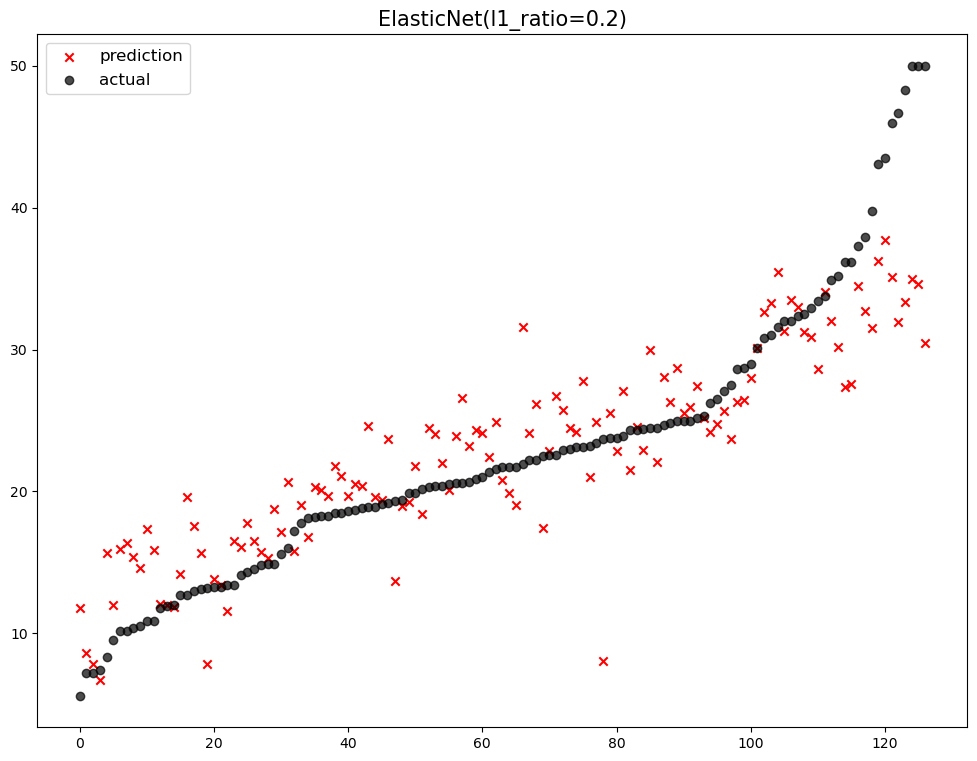

<class 'list'> [('Lasso(alpha=100)', 68.54985530874796), ('Lasso(alpha=10)', 43.58901089020935), ('Lasso(alpha=1)', 28.00564800675634), ('ElasticNet(l1_ratio=0.2)', 24.56492465920505), ('Lasso(alpha=0.1)', 21.55427195561399), ('Lasso(alpha=0.01)', 19.707100947051284), ('Lasso(alpha=0.001)', 19.63753295089373), ('Lasso(alpha=0.0001)', 19.63336107407811), ('LinearRegression', 19.63292883381753)]
                      model        mse
0          Lasso(alpha=100)  68.549855
1           Lasso(alpha=10)  43.589011
2            Lasso(alpha=1)  28.005648
3  ElasticNet(l1_ratio=0.2)  24.564925
4          Lasso(alpha=0.1)  21.554272
5         Lasso(alpha=0.01)  19.707101
6        Lasso(alpha=0.001)  19.637533
7       Lasso(alpha=0.0001)  19.633361
8          LinearRegression  19.632929


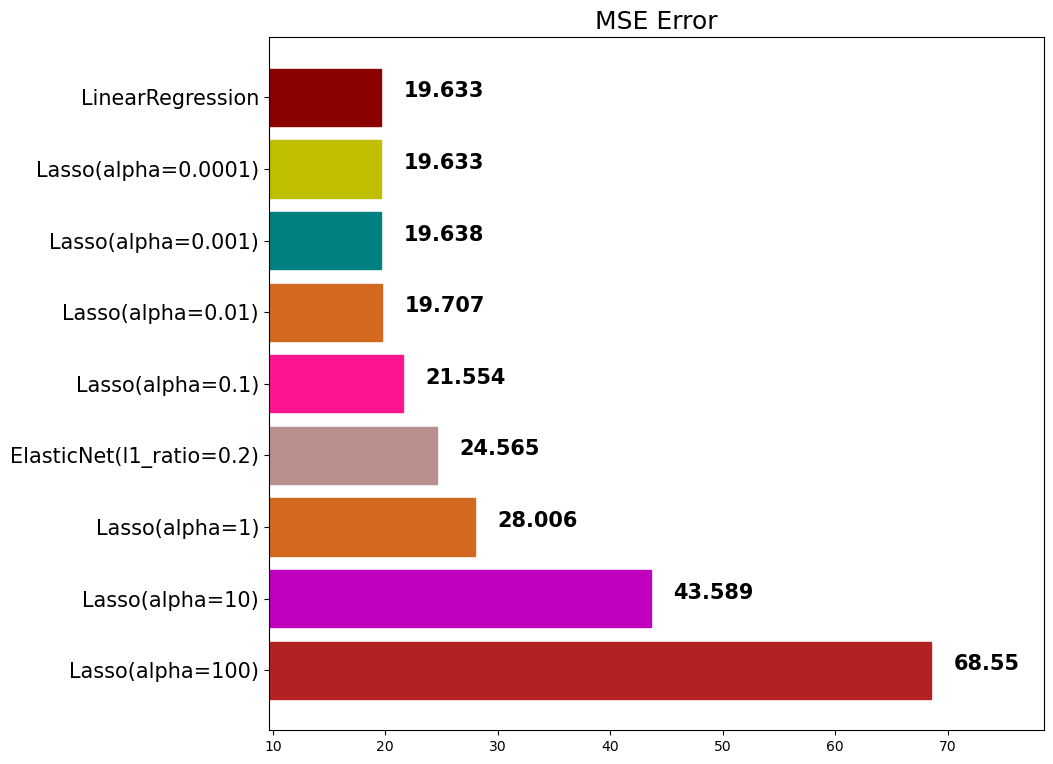

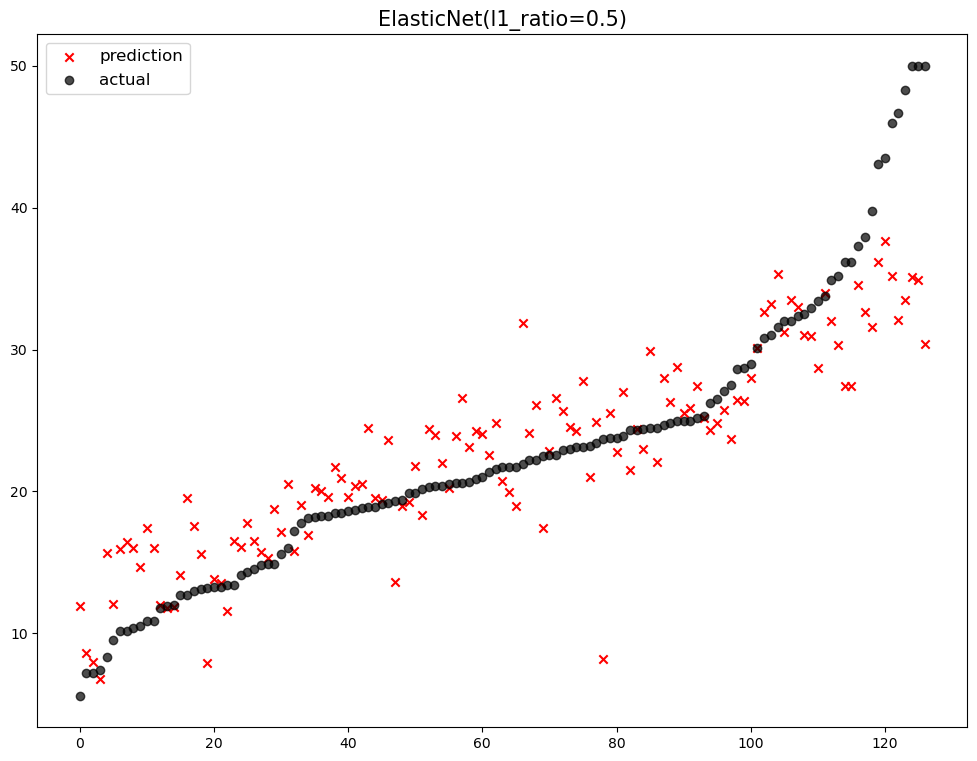

<class 'list'> [('Lasso(alpha=100)', 68.54985530874796), ('Lasso(alpha=10)', 43.58901089020935), ('Lasso(alpha=1)', 28.00564800675634), ('ElasticNet(l1_ratio=0.2)', 24.56492465920505), ('ElasticNet(l1_ratio=0.5)', 24.398032109616942), ('Lasso(alpha=0.1)', 21.55427195561399), ('Lasso(alpha=0.01)', 19.707100947051284), ('Lasso(alpha=0.001)', 19.63753295089373), ('Lasso(alpha=0.0001)', 19.63336107407811), ('LinearRegression', 19.63292883381753)]
                      model        mse
0          Lasso(alpha=100)  68.549855
1           Lasso(alpha=10)  43.589011
2            Lasso(alpha=1)  28.005648
3  ElasticNet(l1_ratio=0.2)  24.564925
4  ElasticNet(l1_ratio=0.5)  24.398032
5          Lasso(alpha=0.1)  21.554272
6         Lasso(alpha=0.01)  19.707101
7        Lasso(alpha=0.001)  19.637533
8       Lasso(alpha=0.0001)  19.633361
9          LinearRegression  19.632929


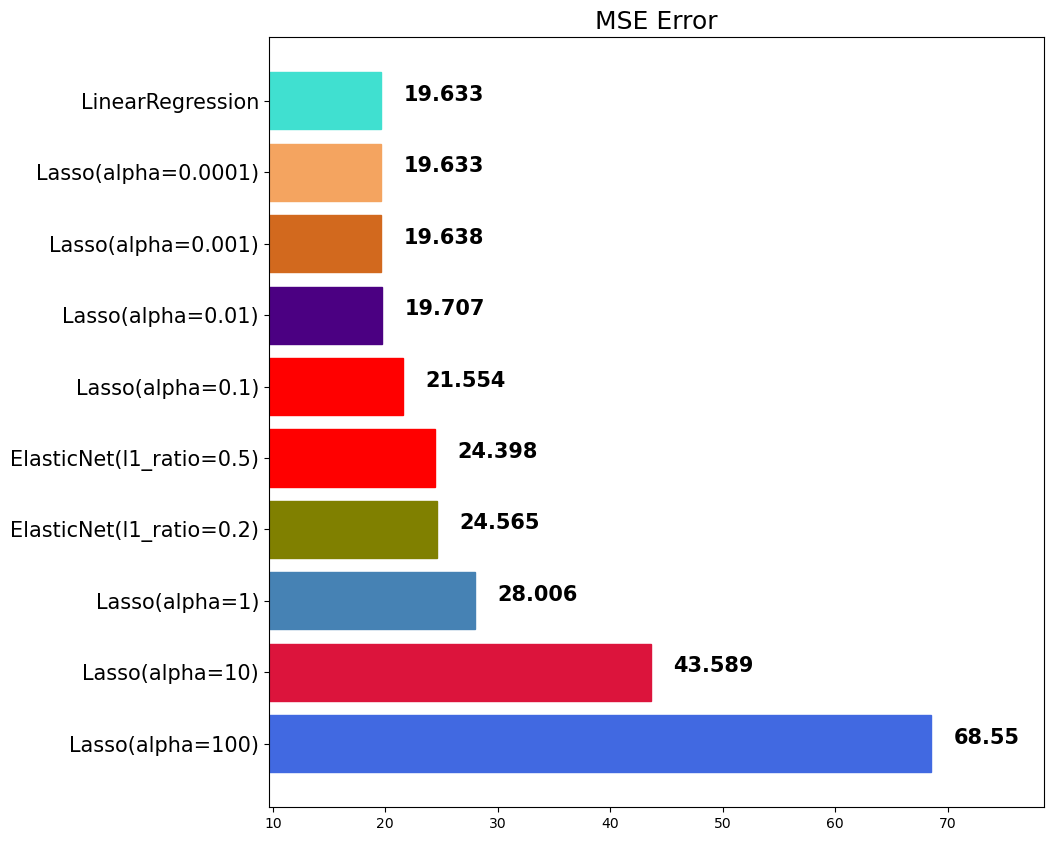

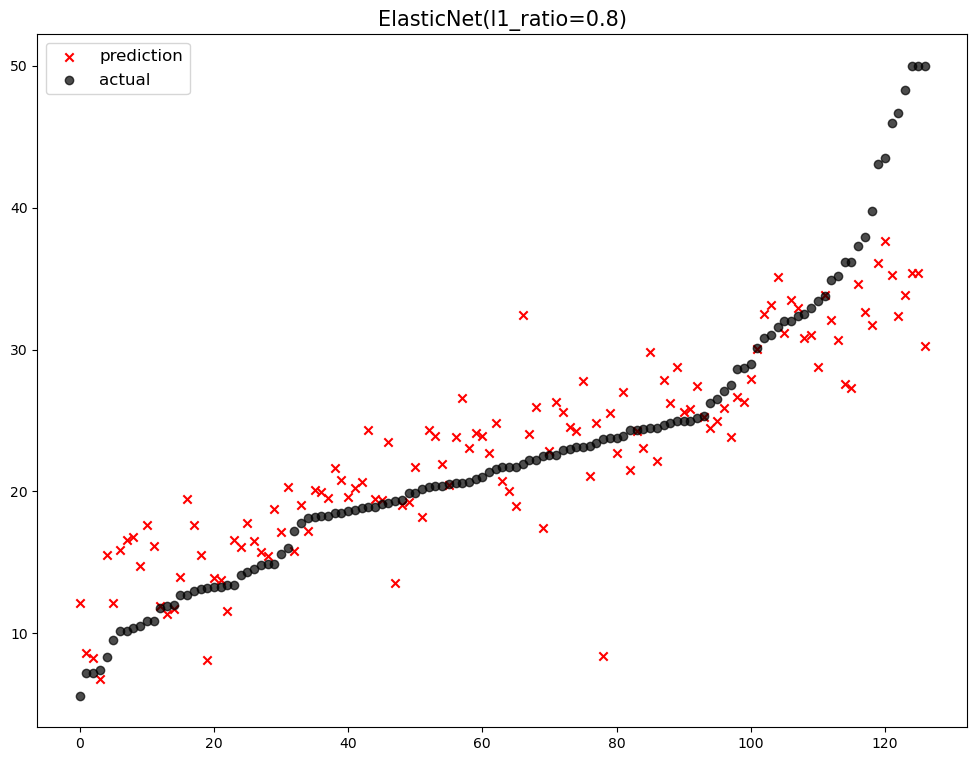

<class 'list'> [('Lasso(alpha=100)', 68.54985530874796), ('Lasso(alpha=10)', 43.58901089020935), ('Lasso(alpha=1)', 28.00564800675634), ('ElasticNet(l1_ratio=0.2)', 24.56492465920505), ('ElasticNet(l1_ratio=0.5)', 24.398032109616942), ('ElasticNet(l1_ratio=0.8)', 24.067832279611178), ('Lasso(alpha=0.1)', 21.55427195561399), ('Lasso(alpha=0.01)', 19.707100947051284), ('Lasso(alpha=0.001)', 19.63753295089373), ('Lasso(alpha=0.0001)', 19.63336107407811), ('LinearRegression', 19.63292883381753)]
                       model        mse
0           Lasso(alpha=100)  68.549855
1            Lasso(alpha=10)  43.589011
2             Lasso(alpha=1)  28.005648
3   ElasticNet(l1_ratio=0.2)  24.564925
4   ElasticNet(l1_ratio=0.5)  24.398032
5   ElasticNet(l1_ratio=0.8)  24.067832
6           Lasso(alpha=0.1)  21.554272
7          Lasso(alpha=0.01)  19.707101
8         Lasso(alpha=0.001)  19.637533
9        Lasso(alpha=0.0001)  19.633361
10          LinearRegression  19.632929


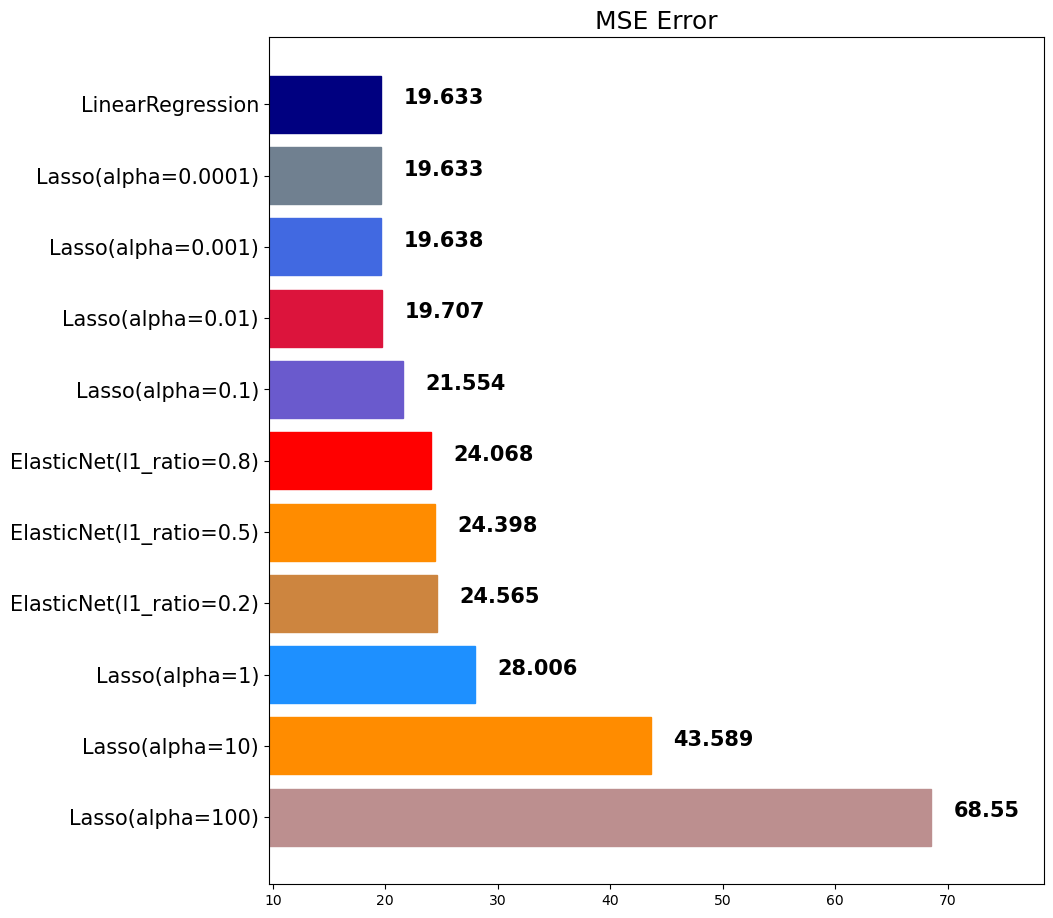

In [45]:
for ratio in ratios:
    elasticnet = ElasticNet(alpha=0.5, l1_ratio=ratio)
    elasticnet.fit(x_train, y_train)
    pred = elasticnet.predict(x_test)
    mse_eval('ElasticNet(l1_ratio={})'.format(ratio), pred, y_test)

In [46]:
elsticnet_20 = ElasticNet(alpha=5, l1_ratio=0.2)
elsticnet_20.fit(x_train, y_train)
elasticnet_pred_20 = elsticnet_20.predict(x_test)

elsticnet_80 = ElasticNet(alpha=5, l1_ratio=0.8)
elsticnet_80.fit(x_train, y_train)
elasticnet_pred_80 = elsticnet_80.predict(x_test)

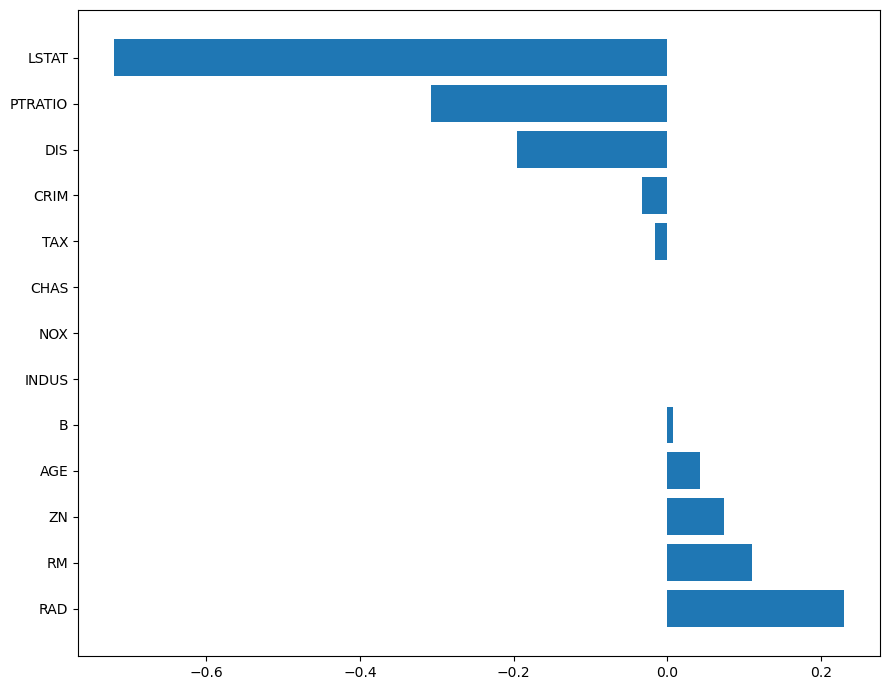

In [47]:
plot_coef(x_train.columns, elsticnet_20.coef_)

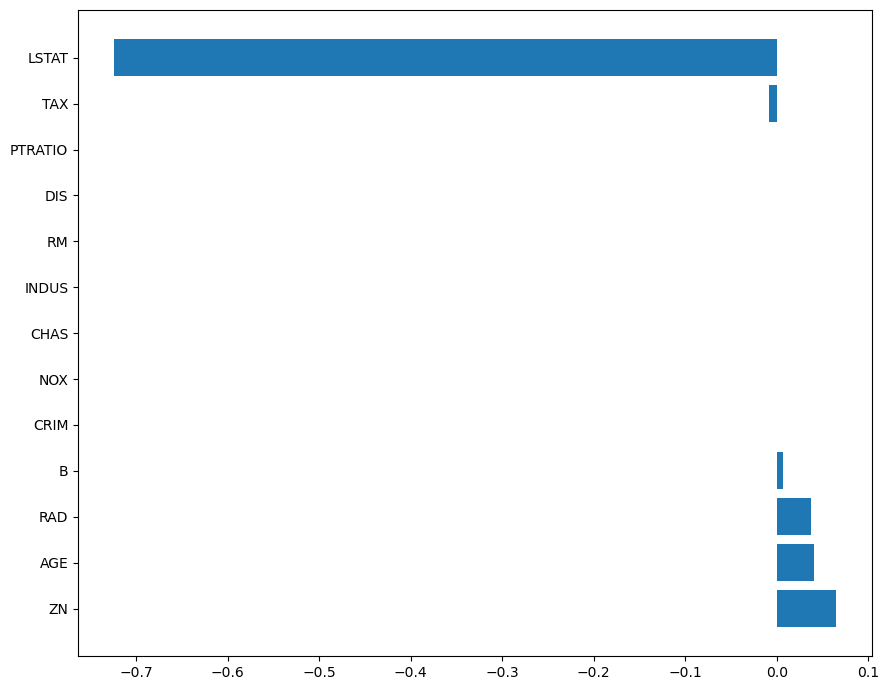

In [48]:
plot_coef(x_train.columns, elsticnet_80.coef_)

In [49]:
elsticnet_80.coef_

array([-0.        ,  0.06483481, -0.        ,  0.        ,  0.        ,
        0.        ,  0.03999787, -0.        ,  0.0371932 , -0.00835662,
       -0.        ,  0.00620535, -0.7241441 ])

## Scaler

In [50]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [51]:
x_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,3.524416,11.139842,11.382111,0.060686,0.558617,6.263596,68.949868,3.732561,9.585752,414.337731,18.382850,358.880290,12.759182
std,8.088365,23.078145,6.941502,0.239069,0.119921,0.711862,28.619642,2.076502,8.759268,167.688098,2.214729,86.099257,7.157097
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,2.600000,1.730000
25%,0.082100,0.000000,5.190000,0.000000,0.448000,5.871500,44.700000,2.007750,4.000000,284.000000,16.800000,375.115000,7.160000
50%,0.253560,0.000000,9.900000,0.000000,0.538000,6.182000,78.100000,3.112100,5.000000,345.000000,18.900000,391.000000,11.660000
75%,3.695030,12.500000,18.100000,0.000000,0.631000,6.617000,94.650000,5.118000,24.000000,666.000000,20.200000,396.210000,16.695000
max,73.534100,95.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


### StandardScaler

평균(mean)을 0, 표준편차(std)를 1로 만들어 주는 스케일러

In [52]:
std_scaler = StandardScaler()

In [53]:
std_scaled = std_scaler.fit_transform(x_train)

In [54]:
round(pd.DataFrame(std_scaled).describe(), 2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.44,-0.48,-1.58,-0.25,-1.45,-3.80,-2.31,-1.26,-0.98,-1.35,-2.61,-4.14,-1.54
25%,-0.43,-0.48,-0.89,-0.25,-0.92,-0.55,-0.85,-0.83,-0.64,-0.78,-0.72,0.19,-0.78
50%,-0.40,-0.48,-0.21,-0.25,-0.17,-0.11,0.32,-0.30,-0.52,-0.41,0.23,0.37,-0.15
75%,0.02,0.06,0.97,-0.25,0.60,0.50,0.90,0.67,1.65,1.50,0.82,0.43,0.55
max,8.67,3.64,2.36,3.93,2.61,3.46,1.09,3.36,1.65,1.77,1.64,0.44,3.53


### MinMaxScaler

min값과 max값을 0~1사이로 정규화

In [55]:
minmax_scaler = MinMaxScaler()
minmax_scaled = minmax_scaler.fit_transform(x_train)

In [56]:
round(pd.DataFrame(minmax_scaled).describe(), 2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,0.05,0.12,0.40,0.06,0.36,0.52,0.68,0.27,0.37,0.43,0.62,0.90,0.30
std,0.11,0.24,0.25,0.24,0.25,0.14,0.29,0.22,0.38,0.32,0.24,0.22,0.20
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.17,0.00,0.13,0.45,0.43,0.09,0.13,0.18,0.45,0.94,0.15
50%,0.00,0.00,0.35,0.00,0.31,0.51,0.77,0.21,0.17,0.30,0.67,0.99,0.27
75%,0.05,0.13,0.65,0.00,0.51,0.59,0.94,0.42,1.00,0.91,0.81,1.00,0.41
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### RobustScaler

중앙값(median)이 0, IQR(interquartile range)이 1이 되도록 변환.

**outlier 값 처리에 유용**

In [57]:
robust_scaler = RobustScaler()
robust_scaled = robust_scaler.fit_transform(x_train)

In [58]:
round(pd.DataFrame(robust_scaled).median(), 2)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
dtype: float64

### 파이프라인

In [59]:
from sklearn.pipeline import make_pipeline

In [60]:
elasticnet_pipeline = make_pipeline(
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)

In [61]:
elasticnet_pred = elasticnet_pipeline.fit(x_train, y_train).predict(x_test)

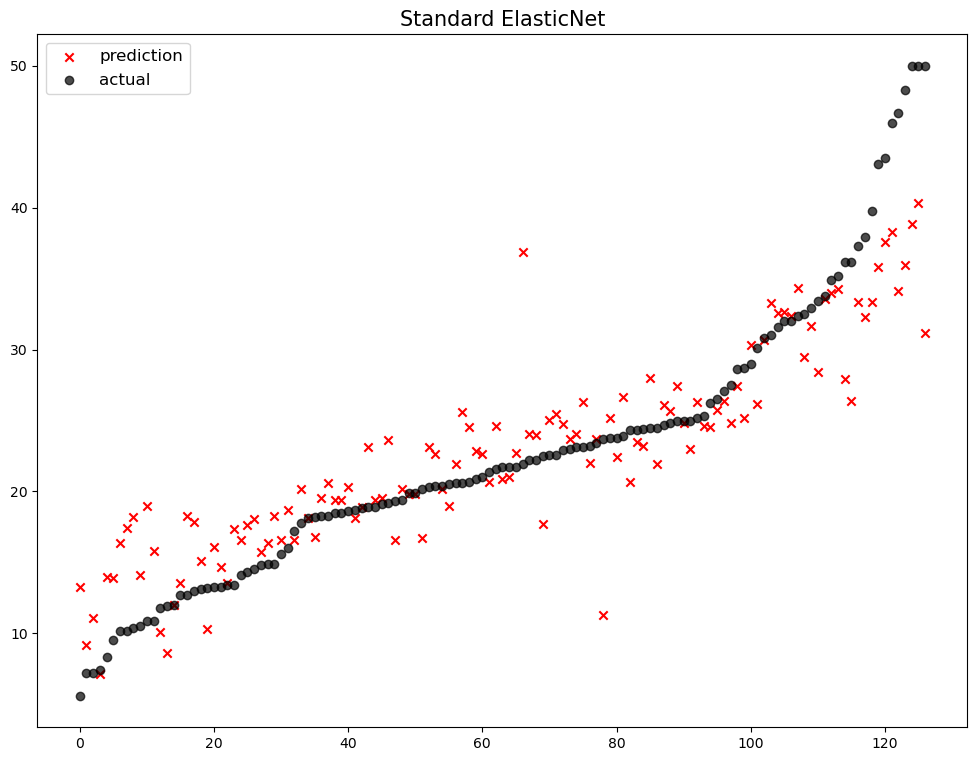

<class 'list'> [('Lasso(alpha=100)', 68.54985530874796), ('Lasso(alpha=10)', 43.58901089020935), ('Lasso(alpha=1)', 28.00564800675634), ('ElasticNet(l1_ratio=0.2)', 24.56492465920505), ('ElasticNet(l1_ratio=0.5)', 24.398032109616942), ('ElasticNet(l1_ratio=0.8)', 24.067832279611178), ('Lasso(alpha=0.1)', 21.55427195561399), ('Standard ElasticNet', 20.24253581628761), ('Lasso(alpha=0.01)', 19.707100947051284), ('Lasso(alpha=0.001)', 19.63753295089373), ('Lasso(alpha=0.0001)', 19.63336107407811), ('LinearRegression', 19.63292883381753)]
                       model        mse
0           Lasso(alpha=100)  68.549855
1            Lasso(alpha=10)  43.589011
2             Lasso(alpha=1)  28.005648
3   ElasticNet(l1_ratio=0.2)  24.564925
4   ElasticNet(l1_ratio=0.5)  24.398032
5   ElasticNet(l1_ratio=0.8)  24.067832
6           Lasso(alpha=0.1)  21.554272
7        Standard ElasticNet  20.242536
8          Lasso(alpha=0.01)  19.707101
9         Lasso(alpha=0.001)  19.637533
10       Lasso(alph

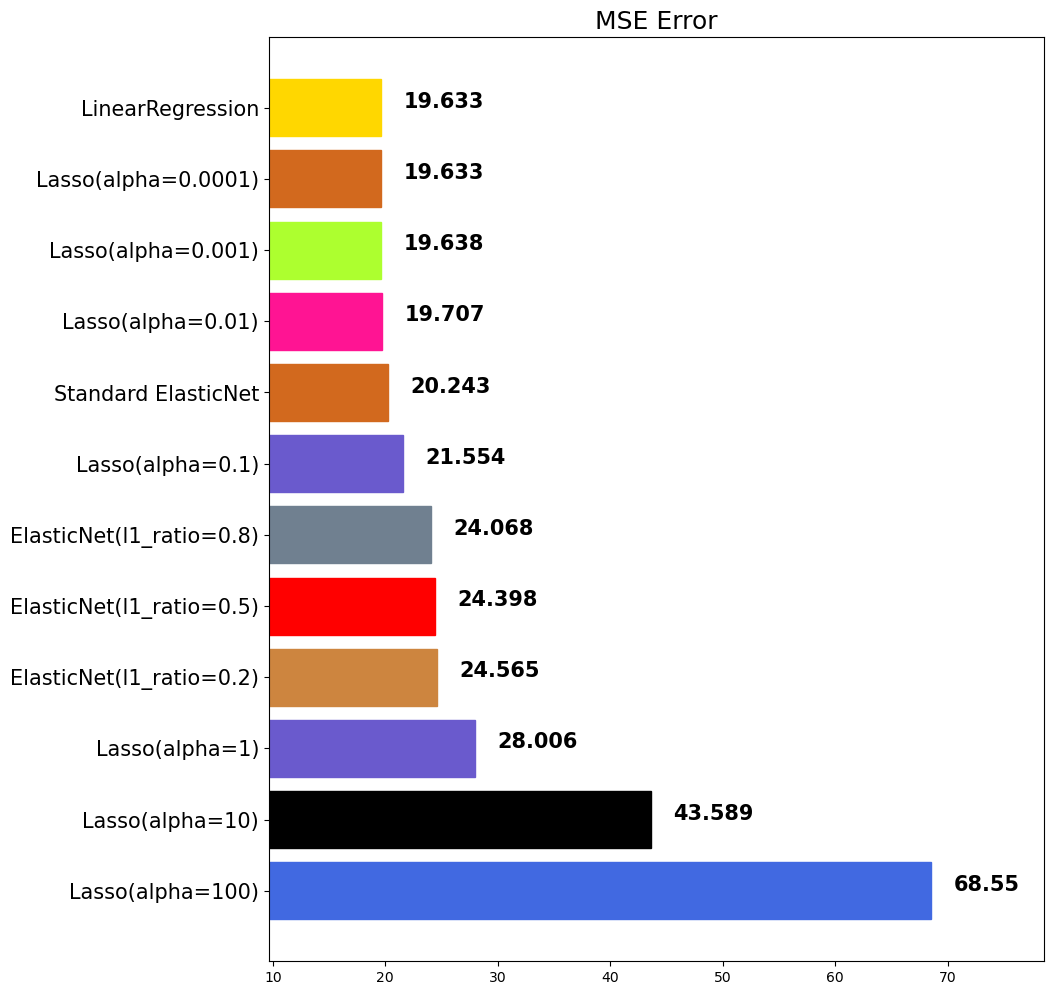

In [62]:
mse_eval('Standard ElasticNet', elasticnet_pred, y_test)

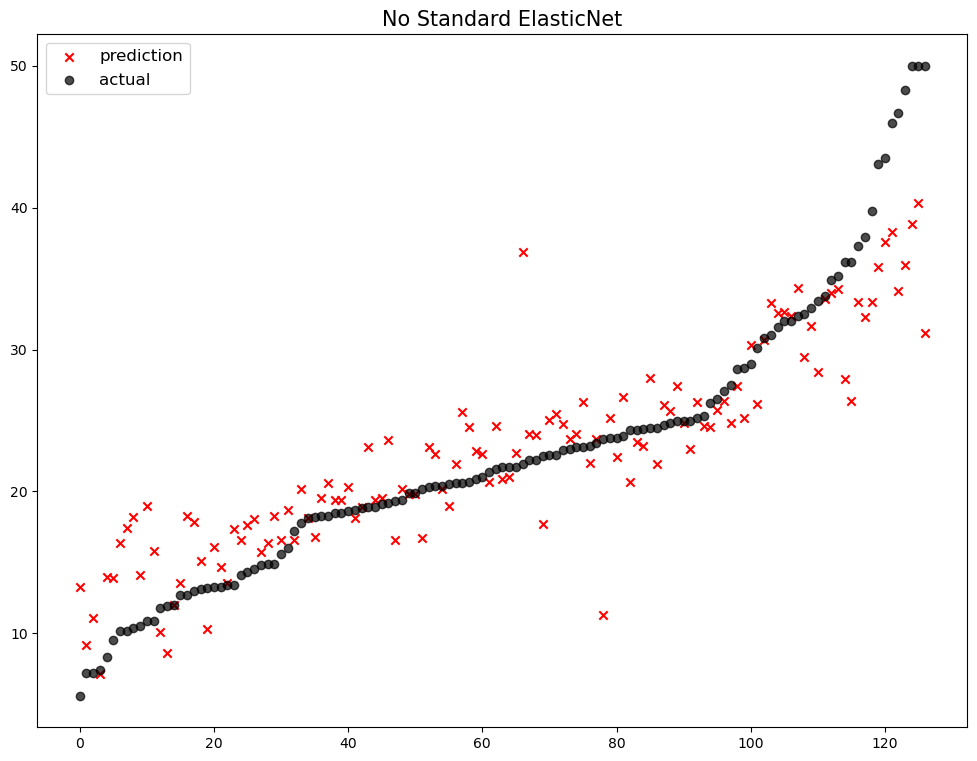

<class 'list'> [('Lasso(alpha=100)', 68.54985530874796), ('Lasso(alpha=10)', 43.58901089020935), ('Lasso(alpha=1)', 28.00564800675634), ('ElasticNet(l1_ratio=0.2)', 24.56492465920505), ('ElasticNet(l1_ratio=0.5)', 24.398032109616942), ('ElasticNet(l1_ratio=0.8)', 24.067832279611178), ('Lasso(alpha=0.1)', 21.55427195561399), ('Standard ElasticNet', 20.24253581628761), ('No Standard ElasticNet', 20.24253581628761), ('Lasso(alpha=0.01)', 19.707100947051284), ('Lasso(alpha=0.001)', 19.63753295089373), ('Lasso(alpha=0.0001)', 19.63336107407811), ('LinearRegression', 19.63292883381753)]
                       model        mse
0           Lasso(alpha=100)  68.549855
1            Lasso(alpha=10)  43.589011
2             Lasso(alpha=1)  28.005648
3   ElasticNet(l1_ratio=0.2)  24.564925
4   ElasticNet(l1_ratio=0.5)  24.398032
5   ElasticNet(l1_ratio=0.8)  24.067832
6           Lasso(alpha=0.1)  21.554272
7        Standard ElasticNet  20.242536
8     No Standard ElasticNet  20.242536
9          L

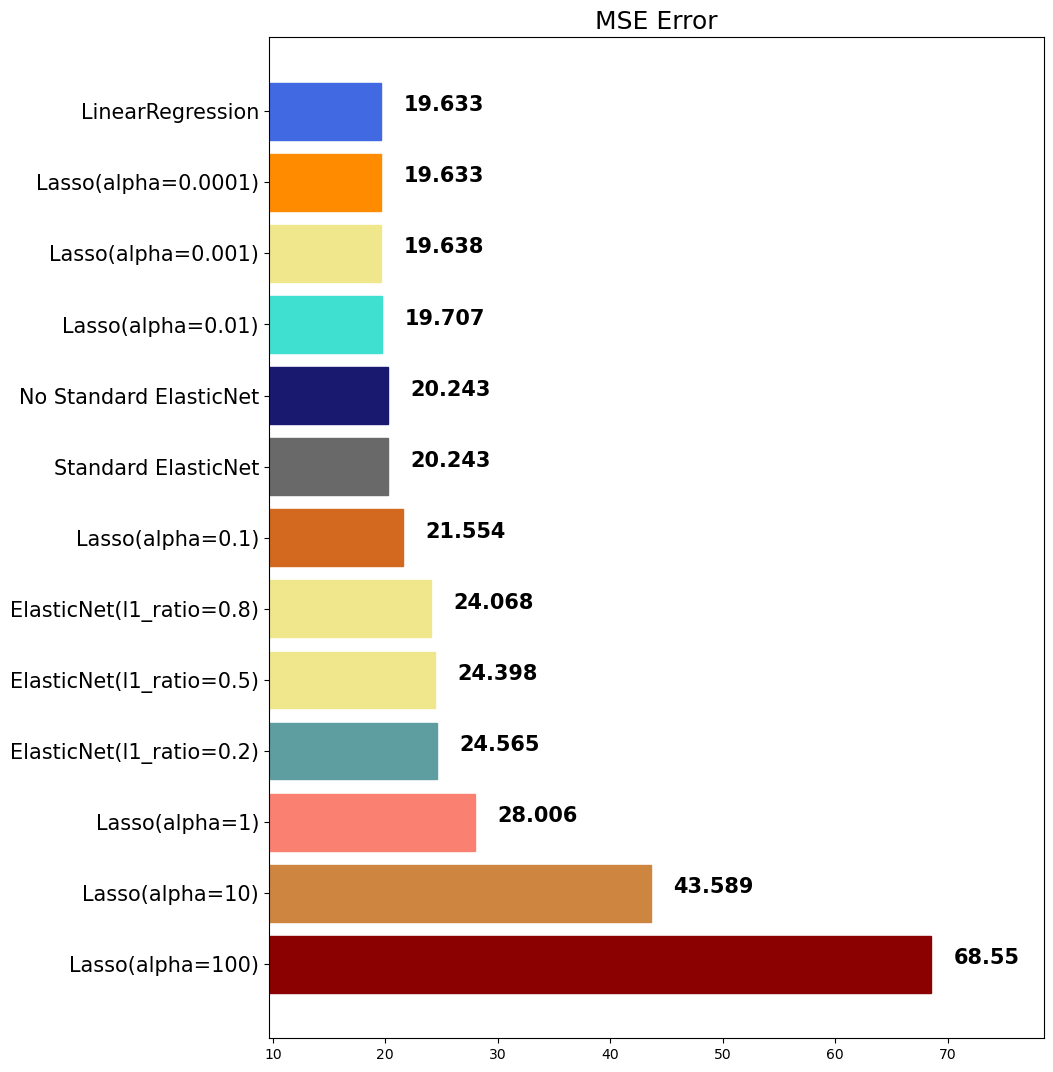

In [63]:
elasticnet_no_pipeline = ElasticNet(alpha=0.1, l1_ratio=0.2)
no_pipeline_pred = elasticnet_no_pipeline.fit(x_train, y_train).predict(x_test)
mse_eval('No Standard ElasticNet', elasticnet_pred, y_test)

### Polynomial Features

[도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html?highlight=poly%20feature#sklearn.preprocessing.PolynomialFeatures)

다항식의 계수간 상호작용을 통해 **새로운 feature를 생성**합니다.

예를들면, [a, b] 2개의 feature가 존재한다고 가정하고,

degree=2로 설정한다면, polynomial features 는 [1, a, b, a^2, ab, b^2] 가 됩니다.

In [64]:
from sklearn.preprocessing import PolynomialFeatures

In [65]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [74]:
poly_features = poly.fit_transform(x_train)[0]
print(x_train.shape[1], " >> ", poly_features.shape[0])

13  >>  104


In [67]:
poly_features

array([     9.2323    ,      0.        ,     18.1       ,      0.        ,
            0.631     ,      6.216     ,    100.        ,      1.1691    ,
           24.        ,    666.        ,     20.2       ,    366.15      ,
            9.53      ,     85.23536329,      0.        ,    167.10463   ,
            0.        ,      5.8255813 ,     57.3879768 ,    923.23      ,
           10.79348193,    221.5752    ,   6148.7118    ,    186.49246   ,
         3380.406645  ,     87.983819  ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,    327.61      ,      0.        ,
           11.4211    ,    112.5096    ,   1810.        ,     21.16071   ,
          434.4       ,  12054.6       ,    365.62      ,   6627.315     ,
          172.493     ,      0.        ,      0.        ,      0.        ,
            0.        ,  

In [68]:
x_train.iloc[0]

CRIM         9.2323
ZN           0.0000
INDUS       18.1000
CHAS         0.0000
NOX          0.6310
RM           6.2160
AGE        100.0000
DIS          1.1691
RAD         24.0000
TAX        666.0000
PTRATIO     20.2000
B          366.1500
LSTAT        9.5300
Name: 371, dtype: float64

In [ ]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)

In [70]:
poly_pred = poly_pipeline.fit(x_train, y_train).predict(x_test)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.188e+01, tolerance: 3.092e+00
  model = cd_fast.enet_coordinate_descent(


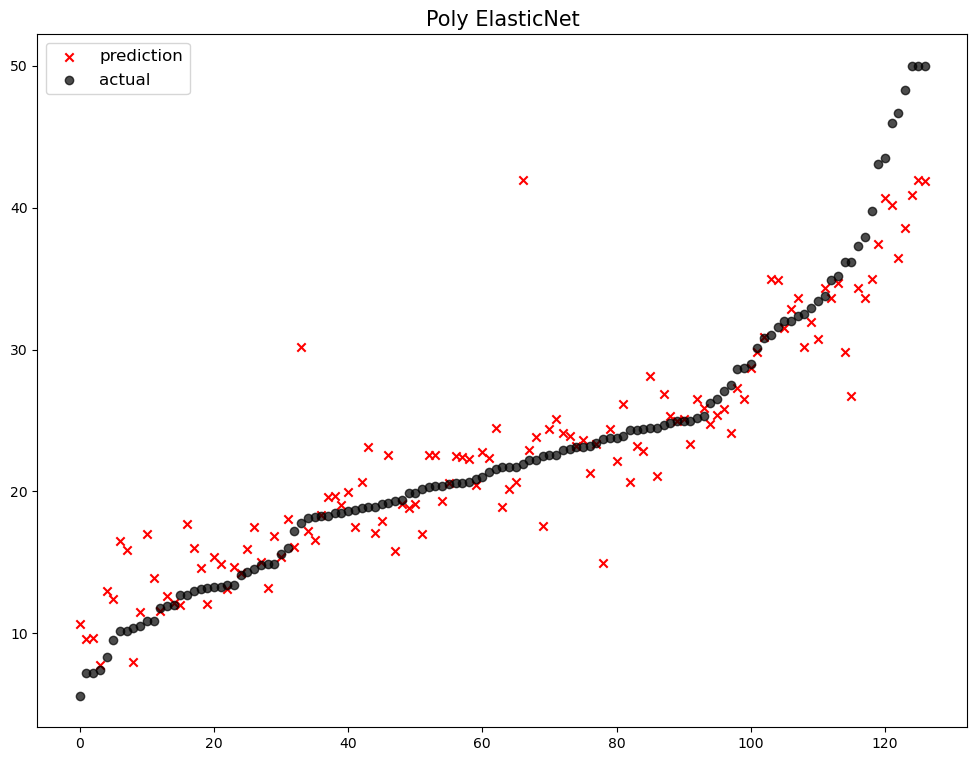

<class 'list'> [('Lasso(alpha=100)', 68.54985530874796), ('Lasso(alpha=10)', 43.58901089020935), ('Lasso(alpha=1)', 28.00564800675634), ('ElasticNet(l1_ratio=0.2)', 24.56492465920505), ('ElasticNet(l1_ratio=0.5)', 24.398032109616942), ('ElasticNet(l1_ratio=0.8)', 24.067832279611178), ('Lasso(alpha=0.1)', 21.55427195561399), ('Standard ElasticNet', 20.24253581628761), ('No Standard ElasticNet', 20.24253581628761), ('Lasso(alpha=0.01)', 19.707100947051284), ('Lasso(alpha=0.001)', 19.63753295089373), ('Lasso(alpha=0.0001)', 19.63336107407811), ('LinearRegression', 19.63292883381753), ('Poly ElasticNet', 14.580885189659073)]
                       model        mse
0           Lasso(alpha=100)  68.549855
1            Lasso(alpha=10)  43.589011
2             Lasso(alpha=1)  28.005648
3   ElasticNet(l1_ratio=0.2)  24.564925
4   ElasticNet(l1_ratio=0.5)  24.398032
5   ElasticNet(l1_ratio=0.8)  24.067832
6           Lasso(alpha=0.1)  21.554272
7        Standard ElasticNet  20.242536
8     No St

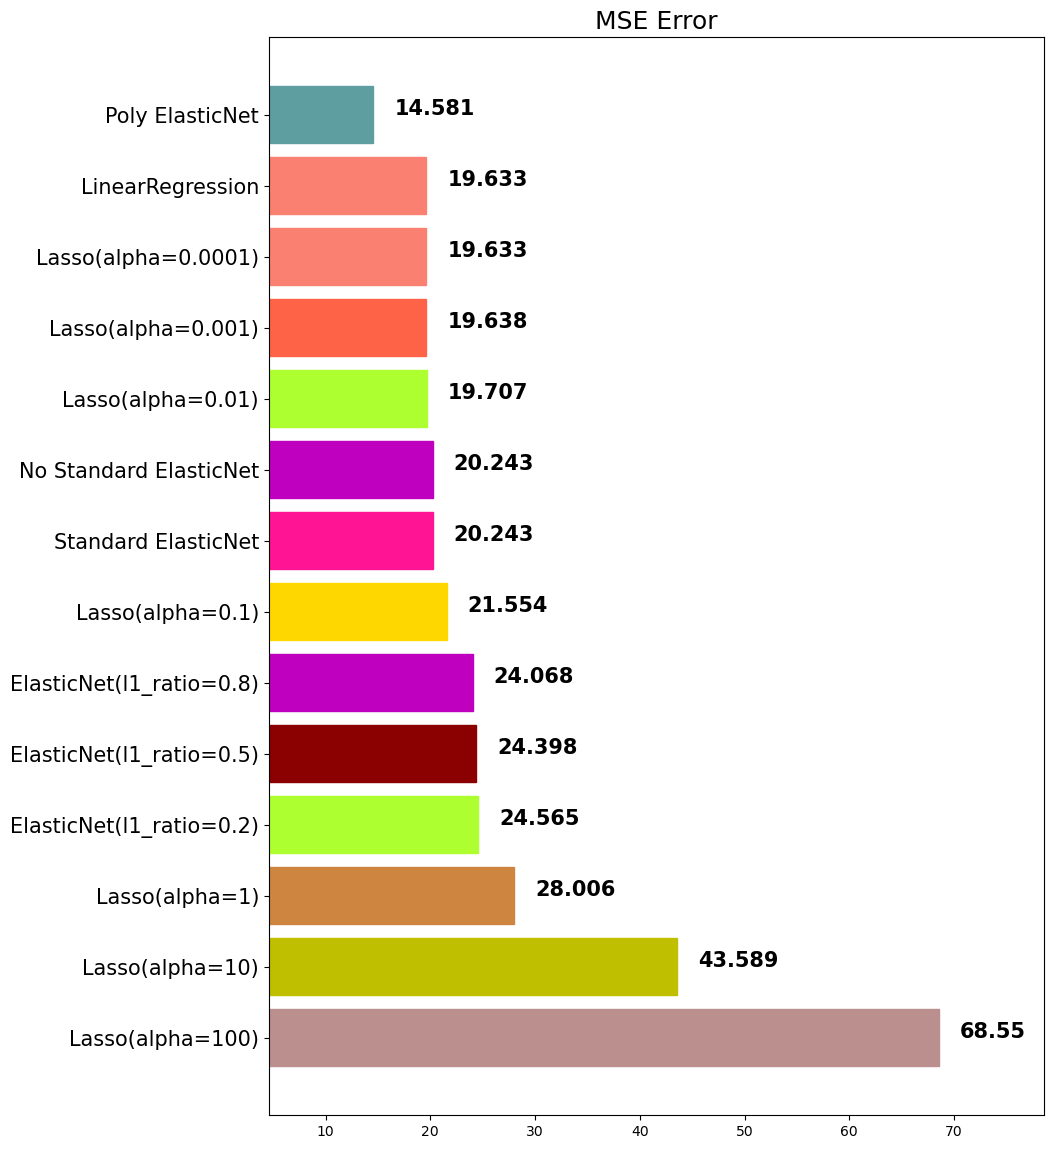

In [71]:
mse_eval('Poly ElasticNet', poly_pred, y_test)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.188e+01, tolerance: 3.092e+00
  model = cd_fast.enet_coordinate_descent(


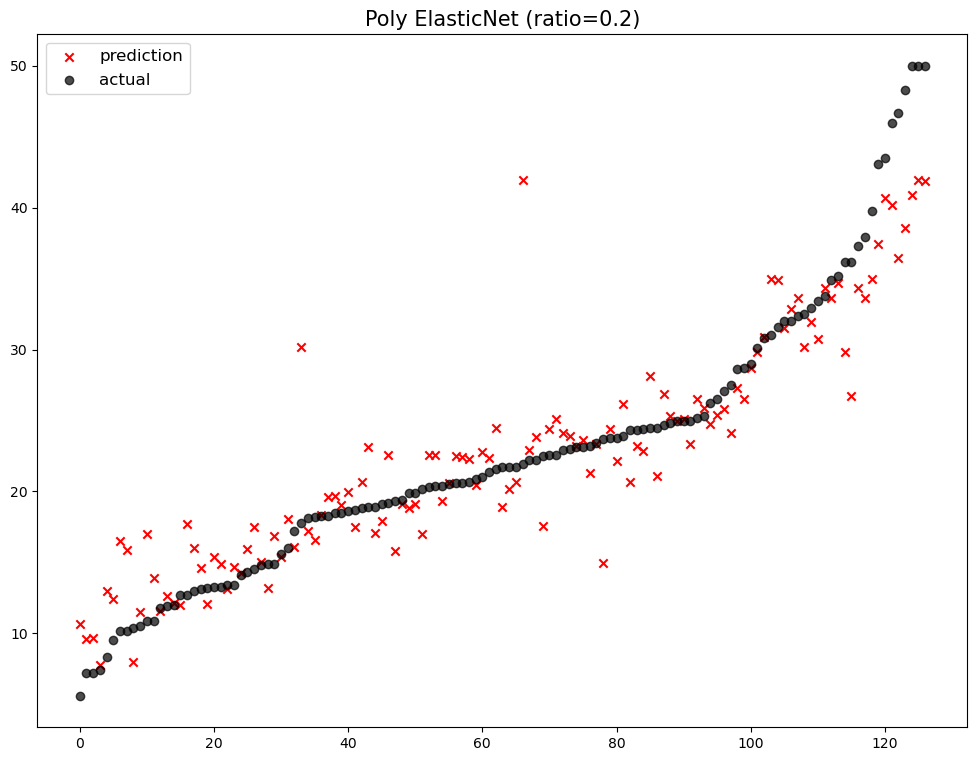

<class 'list'> [('Lasso(alpha=100)', 68.54985530874796), ('Lasso(alpha=10)', 43.58901089020935), ('Lasso(alpha=1)', 28.00564800675634), ('ElasticNet(l1_ratio=0.2)', 24.56492465920505), ('ElasticNet(l1_ratio=0.5)', 24.398032109616942), ('ElasticNet(l1_ratio=0.8)', 24.067832279611178), ('Lasso(alpha=0.1)', 21.55427195561399), ('Standard ElasticNet', 20.24253581628761), ('No Standard ElasticNet', 20.24253581628761), ('Lasso(alpha=0.01)', 19.707100947051284), ('Lasso(alpha=0.001)', 19.63753295089373), ('Lasso(alpha=0.0001)', 19.63336107407811), ('LinearRegression', 19.63292883381753), ('Poly ElasticNet', 14.580885189659073), ('Poly ElasticNet (ratio=0.2)', 14.580885189659073)]
                          model        mse
0              Lasso(alpha=100)  68.549855
1               Lasso(alpha=10)  43.589011
2                Lasso(alpha=1)  28.005648
3      ElasticNet(l1_ratio=0.2)  24.564925
4      ElasticNet(l1_ratio=0.5)  24.398032
5      ElasticNet(l1_ratio=0.8)  24.067832
6              La

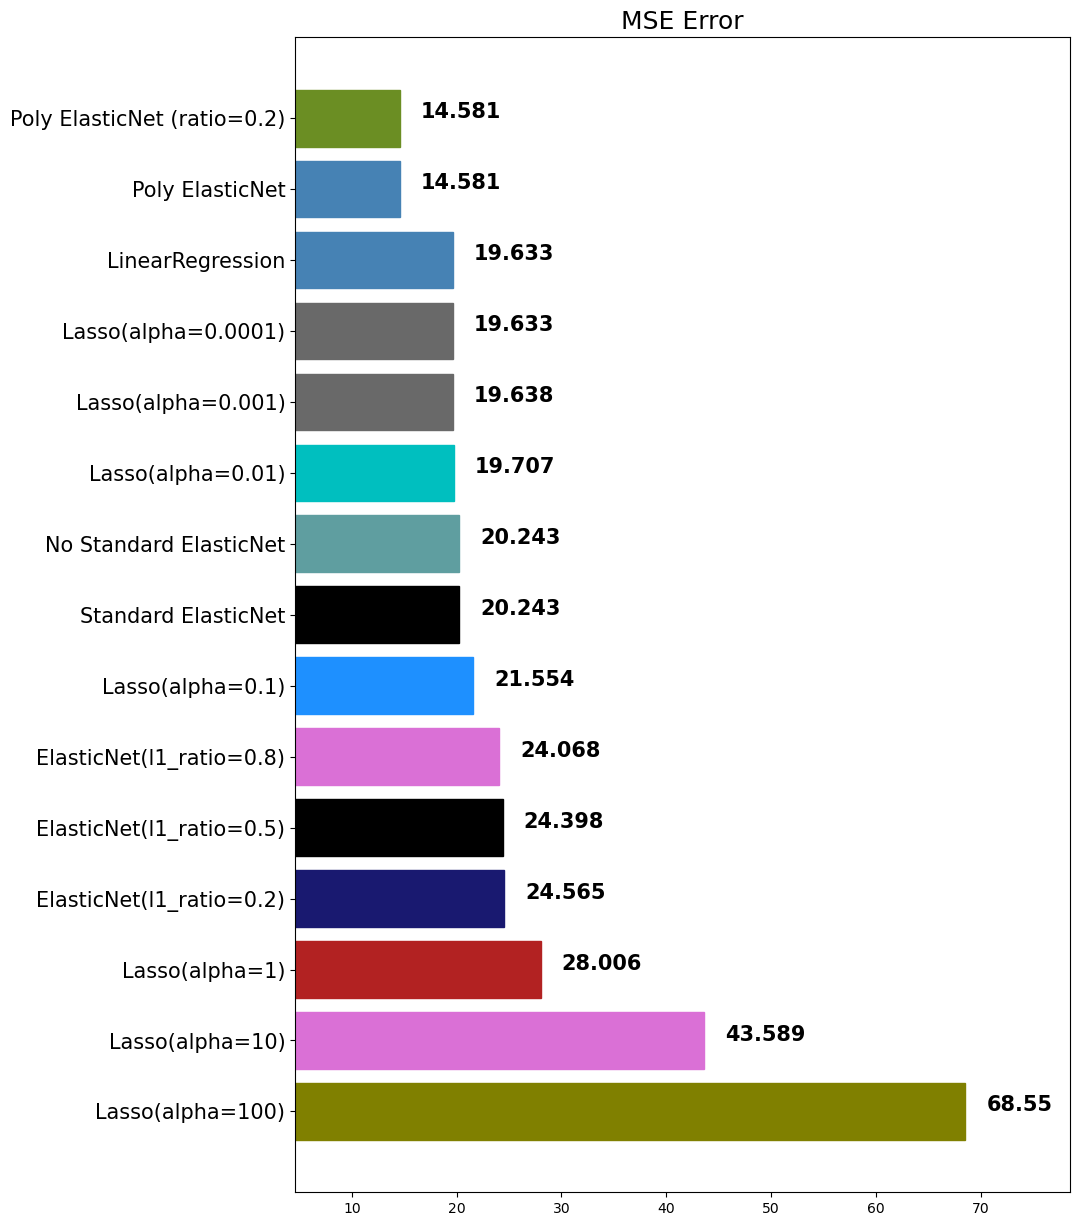

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.188e+01, tolerance: 3.092e+00
  model = cd_fast.enet_coordinate_descent(


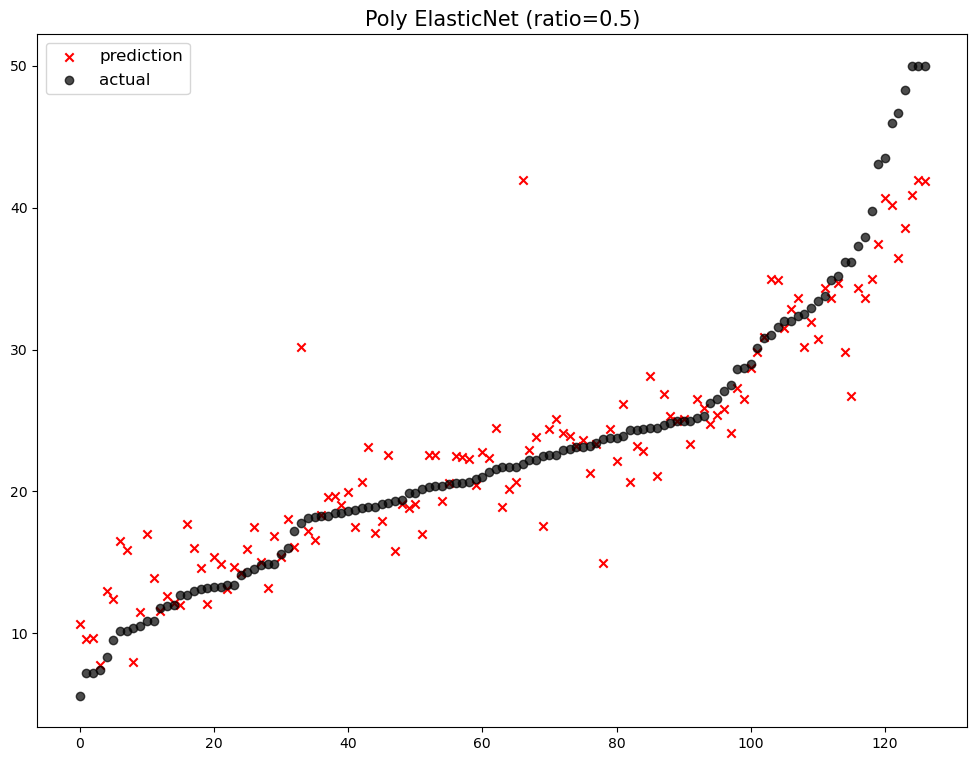

<class 'list'> [('Lasso(alpha=100)', 68.54985530874796), ('Lasso(alpha=10)', 43.58901089020935), ('Lasso(alpha=1)', 28.00564800675634), ('ElasticNet(l1_ratio=0.2)', 24.56492465920505), ('ElasticNet(l1_ratio=0.5)', 24.398032109616942), ('ElasticNet(l1_ratio=0.8)', 24.067832279611178), ('Lasso(alpha=0.1)', 21.55427195561399), ('Standard ElasticNet', 20.24253581628761), ('No Standard ElasticNet', 20.24253581628761), ('Lasso(alpha=0.01)', 19.707100947051284), ('Lasso(alpha=0.001)', 19.63753295089373), ('Lasso(alpha=0.0001)', 19.63336107407811), ('LinearRegression', 19.63292883381753), ('Poly ElasticNet', 14.580885189659073), ('Poly ElasticNet (ratio=0.2)', 14.580885189659073), ('Poly ElasticNet (ratio=0.5)', 14.580885189659073)]
                          model        mse
0              Lasso(alpha=100)  68.549855
1               Lasso(alpha=10)  43.589011
2                Lasso(alpha=1)  28.005648
3      ElasticNet(l1_ratio=0.2)  24.564925
4      ElasticNet(l1_ratio=0.5)  24.398032
5      

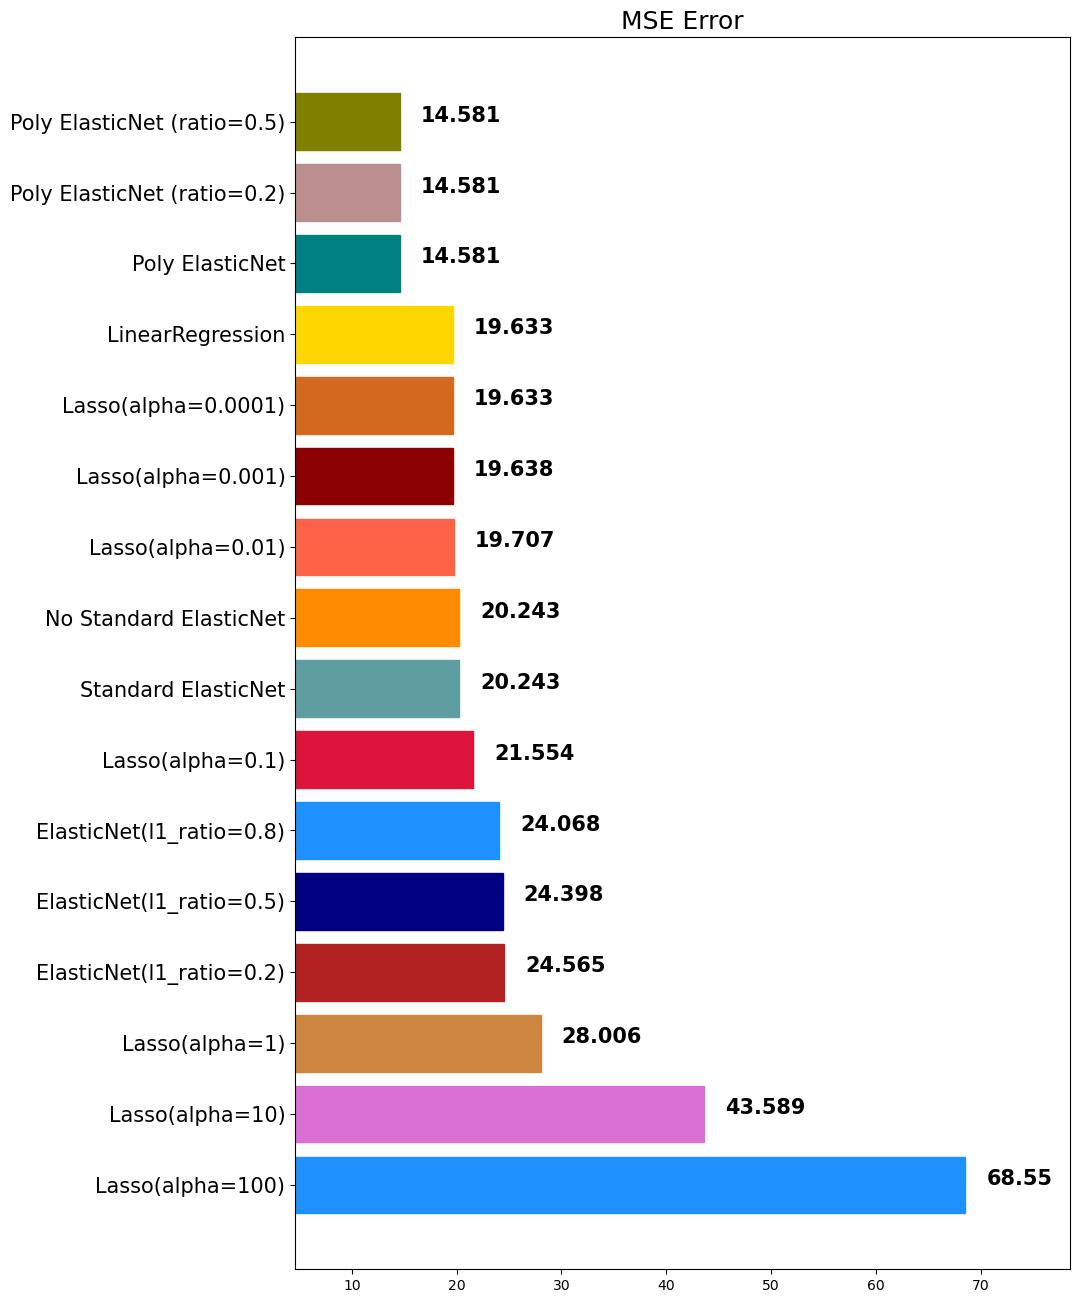

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.188e+01, tolerance: 3.092e+00
  model = cd_fast.enet_coordinate_descent(


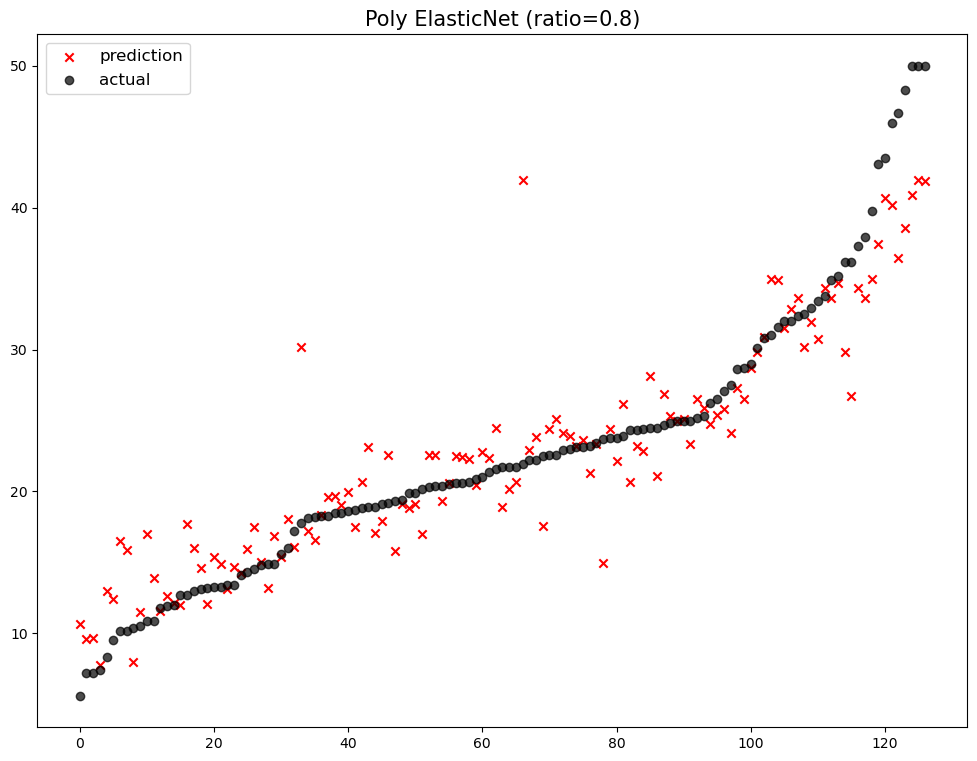

<class 'list'> [('Lasso(alpha=100)', 68.54985530874796), ('Lasso(alpha=10)', 43.58901089020935), ('Lasso(alpha=1)', 28.00564800675634), ('ElasticNet(l1_ratio=0.2)', 24.56492465920505), ('ElasticNet(l1_ratio=0.5)', 24.398032109616942), ('ElasticNet(l1_ratio=0.8)', 24.067832279611178), ('Lasso(alpha=0.1)', 21.55427195561399), ('Standard ElasticNet', 20.24253581628761), ('No Standard ElasticNet', 20.24253581628761), ('Lasso(alpha=0.01)', 19.707100947051284), ('Lasso(alpha=0.001)', 19.63753295089373), ('Lasso(alpha=0.0001)', 19.63336107407811), ('LinearRegression', 19.63292883381753), ('Poly ElasticNet', 14.580885189659073), ('Poly ElasticNet (ratio=0.2)', 14.580885189659073), ('Poly ElasticNet (ratio=0.5)', 14.580885189659073), ('Poly ElasticNet (ratio=0.8)', 14.580885189659073)]
                          model        mse
0              Lasso(alpha=100)  68.549855
1               Lasso(alpha=10)  43.589011
2                Lasso(alpha=1)  28.005648
3      ElasticNet(l1_ratio=0.2)  24.5649

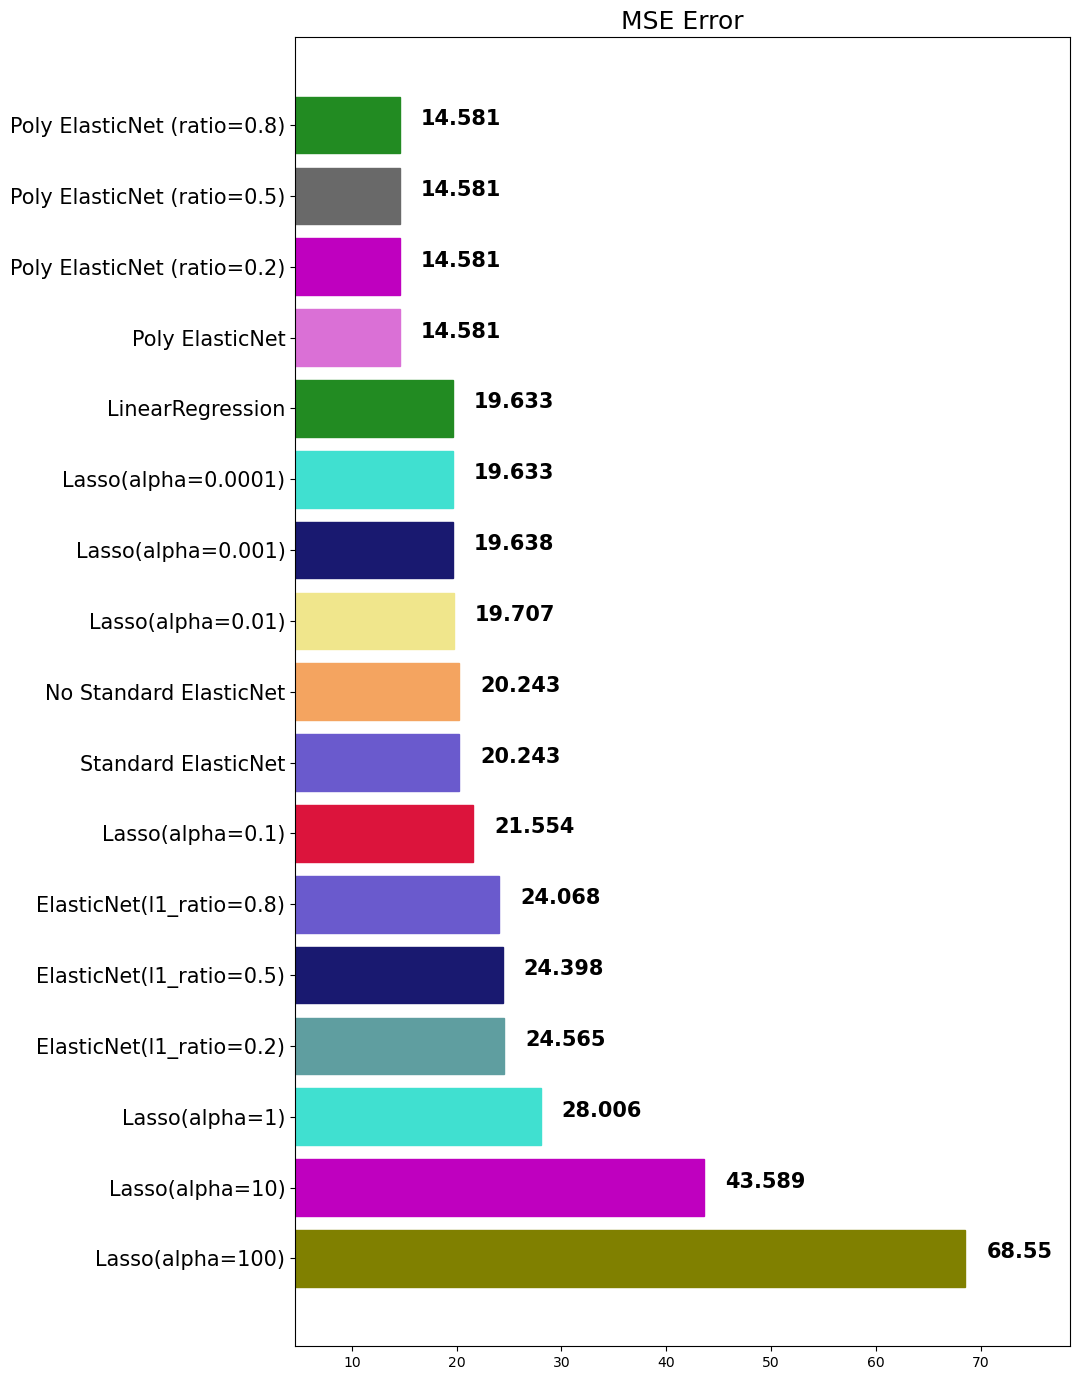

In [76]:
ratio_list = [0.2, 0.5, 0.8]
for ratio in ratio_list:
    poly_pipeline = make_pipeline(
        PolynomialFeatures(degree=2, include_bias=False),
        StandardScaler(),
        ElasticNet(alpha=0.1, l1_ratio=0.2)
    )
    poly_pred = poly_pipeline.fit(x_train, y_train).predict(x_test)
    mse_eval('Poly ElasticNet (ratio={0})'.format(ratio), poly_pred, y_test)